<a href="https://colab.research.google.com/github/Tiger-A/GoogleCollab/blob/main/%D0%92%D0%B5%D0%B1%D0%B8%D0%BD%D0%B0%D1%80_28_%D0%BC%D0%B0%D1%80%D1%82%D0%B0_AutoML_%D0%94%D0%B5%D0%BD%D1%8C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Датасет с табличными данными

In [ ]:
#@title Загрузка датасета и подготовка выборок
# Подключение библиотек
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import gdown
import warnings                    # Управление предупреждениями
warnings.filterwarnings("ignore")  # 'ignore'   Никогда не печатать соответствующие предупреждения
sns.set_style('darkgrid')

from tensorflow.keras.metrics import Precision, Recall

metrics = [
    'accuracy',
    Recall(name="recall"),
    Precision(name="precision")
]

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

class Worker:
  def __init__(self):
    self.dsname = None

  def load_dataset(self):
    self.dsname=gdown.download('https://storage.yandexcloud.net/aiueducation/marketing/datasets/medicine.csv', None, quiet=True)
    print(f'Датасет загружен!\n')

  def show_dataset(self):
    self.dftrain = pd.read_csv(self.dsname, index_col=0)
    # Удаляем не нужный столбец 
    del self.dftrain['ID_y']
    display(self.dftrain.head())


  def dataset_info(self):
    for col in self.dftrain.columns:        
      print(f'----- Параметр {col} -----')
      data = self.dftrain[col].value_counts()
      plt.figure(figsize=(14,6))
      plt.xticks(rotation='vertical')
      xlabels = [f'{x} ({y})' for x,y in zip(list(data.index), data)]
      plt.bar(xlabels[::-1], data[::-1])
      plt.show()

  # Конвертация данных в числовое представление
  def convertToNumeric(self, columns):
    self.dfnumeric = self.dftrain.copy()
    le = LabelEncoder() 
    for feat in columns:
        self.dfnumeric[feat] = le.fit_transform(self.dfnumeric[feat].astype(str))
    self.dfnumeric.fillna(0, inplace=True)
    display(self.dfnumeric.head())

  def matrix_corr(self):
    ###   КОРРЕЛЯЦИЯ - КРИТЕРИЙ СПИРМЕНА
    # Метод, подсчитывающий попарную корреляцию для элементов.
    corr_matrix = self.dfnumeric.corr('spearman') 

    # Можно указать в параметрах способ подсчета.
    plt.figure(figsize=(25, 25))
    sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
                linecolor='black', annot = True, fmt='.1g') 

    plt.show()

  def create_sets(self):
    # Формирование выборки x
    colX = list(self.dfnumeric.columns[:-5])
    x_data = self.dfnumeric[colX].values
    colY = list(self.dfnumeric.columns[-5:])
    y_data = self.dfnumeric.iloc[:, -5:].values
    # Разбиение общей выборки на обучающую и проверочную 
    self.x_train, self.x_val, self.y_train, self.y_val  = train_test_split(x_data, y_data,
                                                    test_size=0.1, 
                                                    shuffle=True,
                                                    random_state = 14)
    print('Выборки созданы! Размеры:')
    print(f'x_train: {self.x_train.shape}')
    print(f'y_train: {self.y_train.shape}')
    print(f'x_val: {self.x_val.shape}')
    print(f'y_val: {self.y_val.shape}')


  def show_learning_information(self, history):
    print('График обучения:')
    # Создание полотна для рисунка
    f, ax = plt.subplots(1, 3, figsize=(20, 6))

    # Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
    ax[0].plot(history.history['accuracy'], 
            label='Доля верных ответов на обучающем наборе')
    ax[0].plot(history.history['val_accuracy'], 
            label='Доля верных ответов на проверочном наборе')
    # Задание подписей осей 
    ax[0].set_title('Метрика: accuracy')

    ax[1].plot(history.history['precision'], 
            label='Доля верных ответов на обучающем наборе')
    ax[1].plot(history.history['val_precision'], 
            label='Доля верных ответов на проверочном наборе')
    # Задание подписей осей 
    ax[1].set_title('Метрика: precision')

    ax[2].plot(history.history['recall'], 
            label='Доля верных ответов на обучающем наборе')
    ax[2].plot(history.history['val_recall'], 
            label='Доля верных ответов на проверочном наборе')
    # Задание подписей осей 
    ax[2].set_title('Метрика: recall')
    # Фиксация графиков и рисование всей картинки
    plt.show()
    print(f'Максимальная точность на обучающей выборке: {round(np.array(history.history["accuracy"]).max(), 3)}')
    print(f'Максимальная точность на проверочной выборке: {round(np.array(history.history["val_accuracy"]).max(), 3)}')
    
    print(f'Максимальная метрика precision  на обучающей выборке: {round(np.array(history.history["precision"]).max(), 3)}')
    print(f'Максимальная метрика precision  на проверочной выборке: {round(np.array(history.history["val_precision"]).max(), 3)}')
    
    print(f'Максимальная метрика recall на обучающей выборке: {round(np.array(history.history["recall"]).max(), 3)}')
    print(f'Максимальная метрика recall на проверочной выборке: {round(np.array(history.history["val_recall"]).max(), 3)}')



  def train_model(self, funcModel, count):
    # Обучение модели сверточной нейронной сети подготовленных данных
    cnt = count
    history_accuracy = []
    history_val_accuracy = []
    history_recall = []
    history_val_recall = []
    history_precision = []
    history_val_precision  = []
    for i in range(cnt):
      model = funcModel()      
      store_learning = model.fit(self.x_train,
                                self.y_train,
                                validation_data=(self.x_val, self.y_val),
                                shuffle=True,
                                batch_size=25,
                                epochs=50, 
                                verbose=0)
      history_accuracy.append(store_learning.history['accuracy'])
      history_val_accuracy.append(store_learning.history['val_accuracy'])
      history_accuracy.append(store_learning.history['accuracy'])
      history_val_accuracy.append(store_learning.history['val_accuracy'])

      history_recall.append(store_learning.history['recall'])
      history_val_recall.append(store_learning.history['val_recall'])

      history_precision.append(store_learning.history['precision'])
      history_val_precision.append(store_learning.history['val_precision'])
      print(f'{bcolors.BOLD}{bcolors.OKBLUE}Обучение №{i+1} завершено. Результаты{bcolors.ENDC}')
      print(f'Максимальная точность на обучающей выборке: {round(np.array(store_learning.history["accuracy"]).max(), 3)}')
      print(f'Максимальная точность на проверочной выборке: {round(np.array(store_learning.history["val_accuracy"]).max(), 3)}')
      print()
      print(f'Максимальная метрика precision на обучающей выборке: {round(np.array(store_learning.history["precision"]).max(), 3)}')
      print(f'Максимальная метрика precision на проверочной выборке: {round(np.array(store_learning.history["val_precision"]).max(), 3)}')
      print()
      print(f'Максимальная метрика recall на обучающей выборке: {round(np.array(store_learning.history["recall"]).max(), 3)}')
      print(f'Максимальная метрика recall на проверочной выборке: {round(np.array(store_learning.history["val_recall"]).max(), 3)}')
      
      print('\n'*3)
    print(f'{bcolors.BOLD}###############################################################################{bcolors.ENDC}')
    print(f'{bcolors.HEADER} Финальные результаты{bcolors.ENDC}')
    print(f'Средняя точность на обучающей выборке: {round(np.array(history_accuracy).max(axis=1).mean(), 3)}')
    print(f'Максимальная точность на обучающей выборке: {round(np.array(history_accuracy).max(), 3)}')
    print(f'Средняя точность на проверочной выборке: {round(np.array(history_val_accuracy).max(axis=1).mean(), 3)}')
    print(f'Максимальная точность на проверочной выборке: {round(np.array(history_val_accuracy).max(), 3)}')
    print()
    print(f'Средняя метрика precision на обучающей выборке: {round(np.array(history_precision).max(axis=1).mean(), 3)}')
    print(f'Максимальная метрика precision на обучающей выборке: {round(np.array(history_precision).max(), 3)}')
    print(f'Средняя метрика precision на проверочной выборке: {round(np.array(history_val_precision).max(axis=1).mean(), 3)}')
    print(f'Максимальная метрика precision на проверочной выборке: {round(np.array(history_val_precision).max(), 3)}')
    print()
    print(f'Средняя метрика recall на обучающей выборке: {round(np.array(history_recall).max(axis=1).mean(), 3)}')
    print(f'Максимальная метрика recall на обучающей выборке: {round(np.array(history_recall).max(), 3)}')
    print(f'Средняя метрика recall на проверочной выборке: {round(np.array(history_val_recall).max(axis=1).mean(), 3)}')
    print(f'Максимальная метрика recall на проверочной выборке: {round(np.array(history_val_recall).max(), 3)}')

  def create_net_from_bot(self, bot):    
    print(f'{bcolors.OKBLUE}{bcolors.UNDERLINE}Выбранные параметры{bcolors.ENDC}')
    columns_from_bot = np.array(bot[-self.x_train.shape[1]:])
    columns = self.dftrain.columns
    for i in range(len(columns_from_bot)):
      if columns_from_bot[i]:
        print(f'   {bcolors.OKGREEN}{bcolors.BOLD}{columns[i]}{bcolors.ENDC}')
      else:
        print(f'   {bcolors.FAIL}{bcolors.BOLD}{columns[i]}{bcolors.ENDC}')
    
    #Создаём сеть (net - список параметров)  
    print(f'{bcolors.OKBLUE}{bcolors.UNDERLINE}\nСтруктура модели{bcolors.ENDC}')  
    columns = np.array(bot[-self.x_train.shape[1]:])  
    model = Sequential()             # Создаем моель Sequential
    print(f'  model = Sequential()')

    '''
    Присвоение значений параметрам слоев из значений полученного бота
  
    Входной блок
    '''
    makeFirstNormalization = bot[0]  # Делаем ли нормализацию в начале
    firstDenseSize = 2 ** bot[1]     # Размер Dense-слоя  
    activation0 = bot[2]             # Функция активации входного слоя
    dropout0 = bot[3]                # Делаем ли дропаут
    dropout0_size= bot[4]            # Размер дропаута

    '''
    Первый скрытый
    '''
    makeSecond  = bot[5]             # Делаем ли второй свёрточный слой
    secondDenseSize = 2 ** bot[6]     # Размер второго слоя
    activation1 = bot[7]             # Функция активации входного слоя
    dropout1 = bot[8]                # Делаем ли дропаут
    dropout1_size= bot[9]            # Размер дропаута

    '''
    Второй скрытый
    '''
    makeThird  = bot[10]             # Делаем ли второй свёрточный слой
    thirdDenseSize = 2 ** bot[11]    # Размер второго слоя
    activation2 = bot[12]             # Функция активации входного слоя
    dropout2 = bot[13]                # Делаем ли дропаут
    dropout2_size= bot[14]            # Размер дропаута

    '''
    Выходной dense блок
    '''
    denseSize1 = 2 ** bot[15]        # Размер предпоследнего полносвязного слоя 
    activationdense1 = bot[16]       # Функция активации предпоследнего полносвязного слоя 
    makeSecondNormalization = bot[17]  # Делаем ли нормализацию в начале
    activationdense2 = bot[18]       # Функция активации дпоследнего полносвязного слоя 

    '''
    Список активационных функций
    '''
    activation_list = ['linear','relu', 'elu', 'selu' ,'tanh', 'sigmoid'] 


    '''
    Условия для формирования блоков
    _______________________________

    Входной Conv блок
    '''
    # Если делаем нормализацию в начале
    if (makeFirstNormalization):      
        # Добавляем слой BatchNormalization
        model.add(BatchNormalization(input_dim=np.array((columns==1)).sum()))
        print(f'  model.add(BatchNormalization(input_dim={np.array((columns==1)).sum()}))')

        # Добавляем слой 
        model.add(Dense(firstDenseSize, activation=activation_list[activation0])) 
        print(f'  model.add(Dense({firstDenseSize}, activation="{activation_list[activation0]}"))')

    else:
        # Добавляем Conv1D-слой с firstConvSize нейронами и ядром (firstConvKernel)
        model.add(Dense(firstDenseSize, activation=activation_list[activation0], input_dim=np.array((columns==1)).sum()))
        print(f'  model.add(Dense({firstDenseSize}, activation="{activation_list[activation0]}", input_dim={np.array((columns==1)).sum()}))')
        # Если делаем maxpooling
    if dropout0:               
        model.add(Dropout(dropout0_size))
        print(f'  model.add(Dropout({dropout0_size}))')

    '''
    Первый скрытый блок
    '''
    # Если делаем второй свёрточный слой
    if (makeSecond):              
        # Добавляем Conv1D-слой с secondConvSize нейронами и ядром (secondConvKernel)
        model.add(Dense(secondDenseSize, activation=activation_list[activation1])) 
        print(f'  model.add(Dense({secondDenseSize}, activation="{activation_list[activation1]}"))')
        
        # Если делаем MaxPooling      
        if dropout1:
          model.add(Dropout(dropout1_size))
          print(f'  model.add(Dropout({dropout1_size}))')

    '''
    Второй скрытый блок
    '''
    # Если делаем второй свёрточный слой
    if (makeThird):              
        # Добавляем Conv1D-слой с secondConvSize нейронами и ядром (secondConvKernel)
        model.add(Dense(thirdDenseSize, activation=activation_list[activation2])) 
        print(f'  model.add(Dense({thirdDenseSize}, activation="{activation_list[activation2]}"))')
        
        # Если делаем MaxPooling      
        if dropout2:
          model.add(Dropout(dropout2_size))
          print(f'  model.add(Dropout({dropout2_size}))')

    '''
    Выходной dense блок
    '''
    # Если делаем финальную нормализацию         
    if (makeSecondNormalization):     
        model.add(BatchNormalization()) # Добавляем слой BatchNormalization
        print(f'  model.add(BatchNormalization())')
    # Добавляем слой Dense с denseSize нейронами  
    model.add(Dense(denseSize1, activation=activation_list[activationdense1]))
    print(f'  model.add(Dense({denseSize1}, activation="{activation_list[activationdense1]}"))')
    # Добавляем Dense-слой с softmax-активацией и 10 нейронами
    model.add(Dense(5, activation="sigmoid"))
    print(f'  model.add(Dense(5, activation="sigmoid"))')
    
    model.compile(optimizer=Adam(0.005), loss='categorical_crossentropy', metrics=[metrics])
    print(f'{bcolors.OKBLUE}{bcolors.UNDERLINE}\nОбучение модели{bcolors.ENDC}')  
    store_learning = model.fit(self.x_train[:, np.array(bot[-self.x_train.shape[1]:])==1],
                              self.y_train,
                              validation_data=(self.x_val[:, np.array(bot[-self.x_train.shape[1]:])==1], self.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=30, 
                           verbose=0)
    self.show_learning_information(store_learning)

worker=Worker()

In [ ]:
# Загрузка датасета
worker.load_dataset()

Датасет загружен!



# Статистика по датасету:

In [ ]:
# Выводи примеров
worker.show_dataset()

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,...,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
ID,,,,,,,,,,,,,,,,,,,,,
54-102-358-02,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,0,...,22:00:00,06:00:00,0,0,0,0,0,0,0,0
54-103-101-01,Ж,в разводе,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,...,00:00:00,04:00:00,1,0,0,1,1,0,0,0
54-501-026-03,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,...,23:00:00,07:00:00,0,0,0,0,0,0,0,0
54-501-094-02,М,в браке в настоящее время,европейская,Русские,Атеист / агностик,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,0,...,23:00:00,07:00:00,0,0,0,1,0,0,0,0
54-503-022-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,операторы и монтажники установок и машинного о...,0,0,1,...,23:00:00,06:00:00,0,0,0,1,0,1,1,0


----- Параметр Пол -----


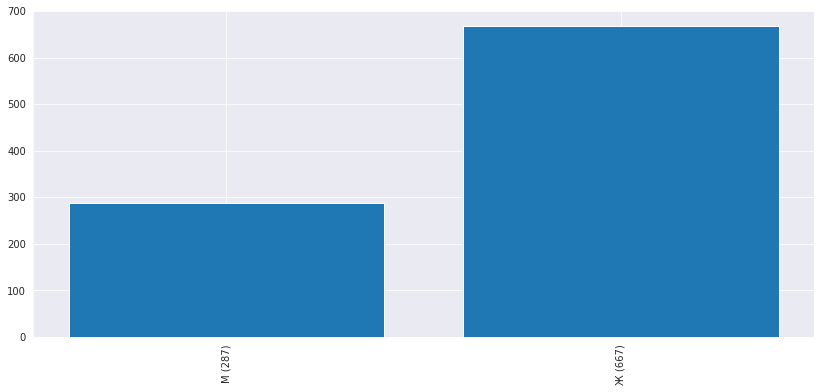

----- Параметр Семья -----


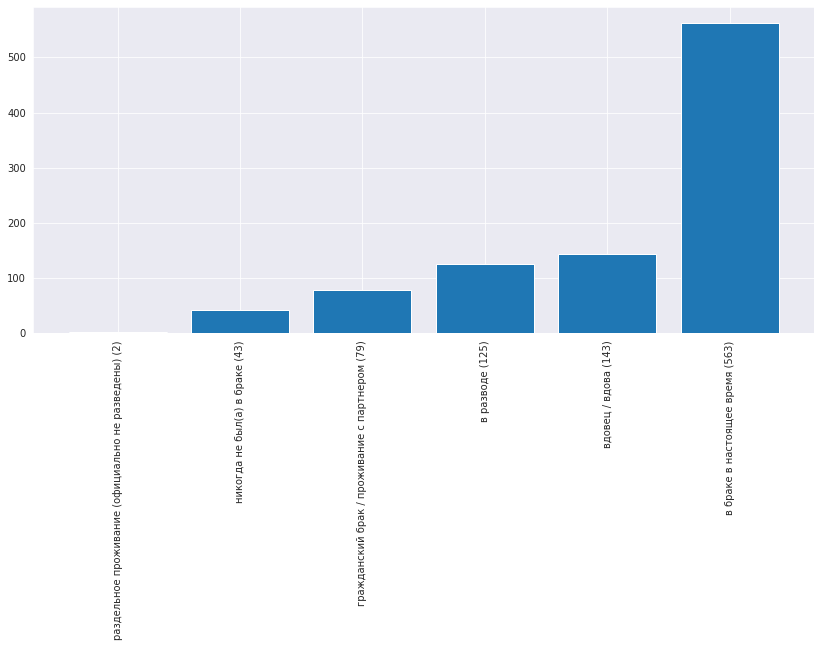

----- Параметр Этнос -----


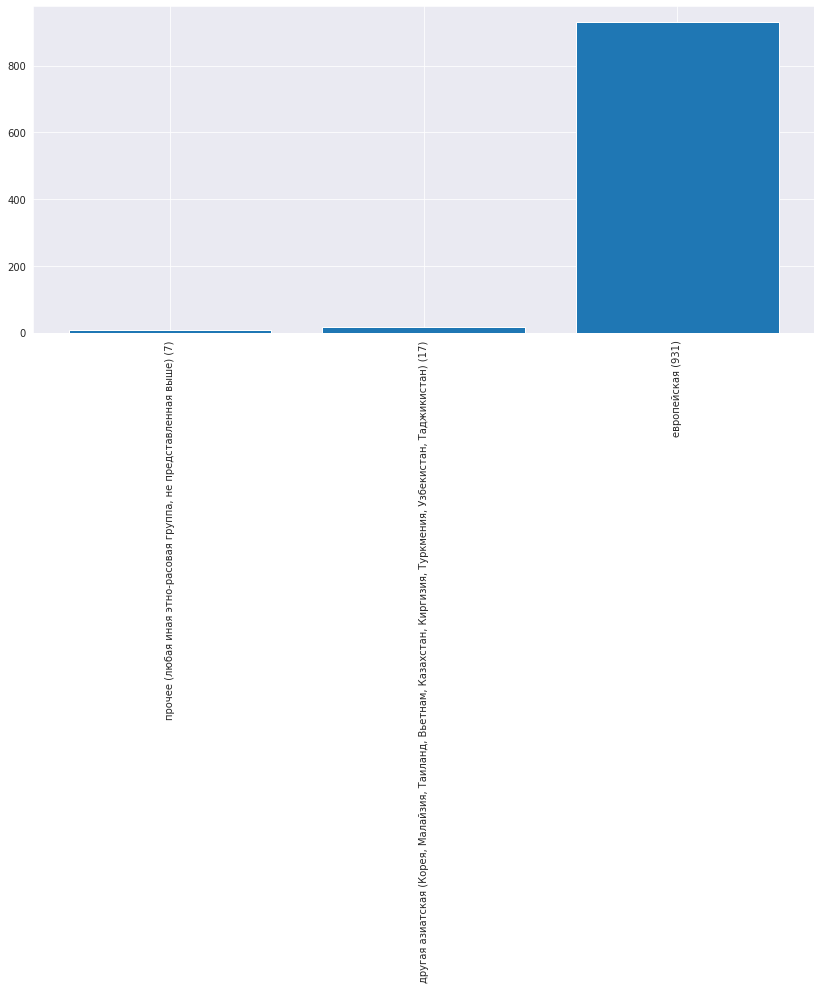

----- Параметр Национальность -----


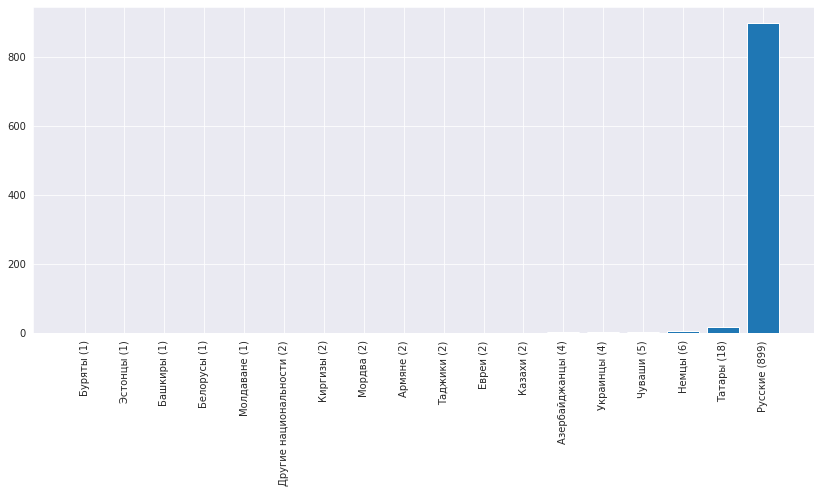

----- Параметр Религия -----


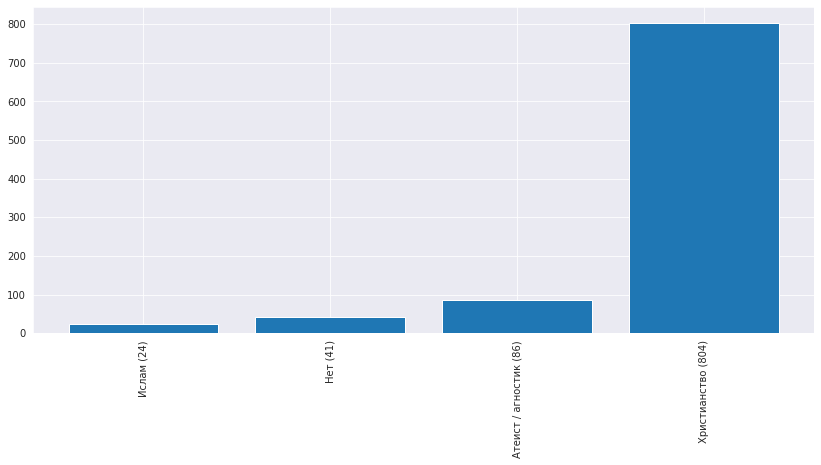

----- Параметр Образование -----


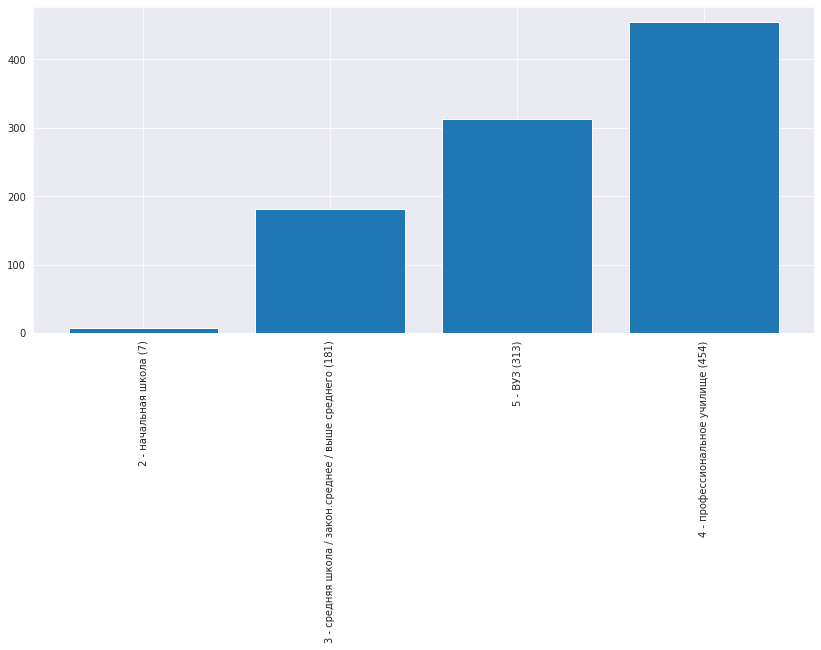

----- Параметр Профессия -----


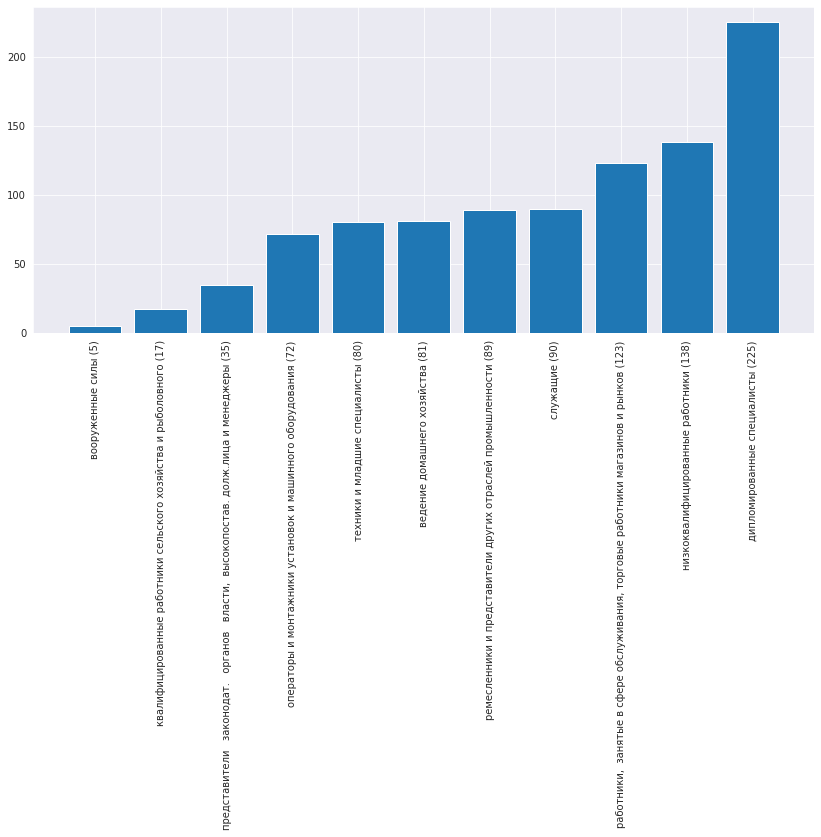

----- Параметр Вы работаете? -----


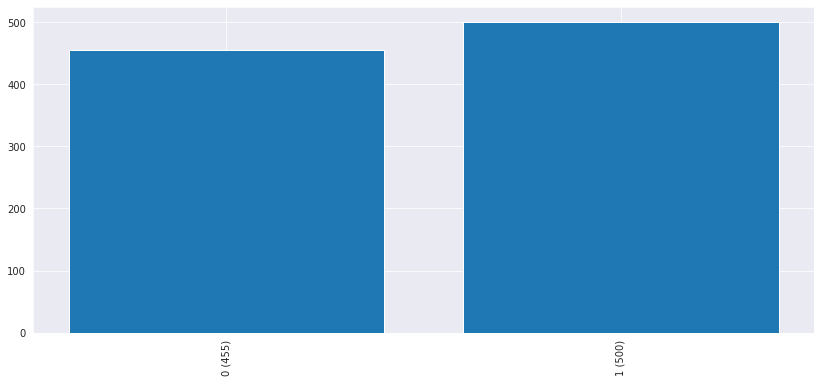

----- Параметр Выход на пенсию -----


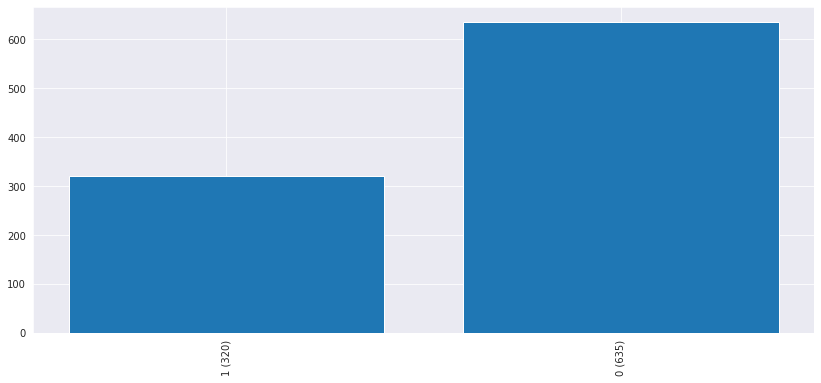

----- Параметр Прекращение работы по болезни -----


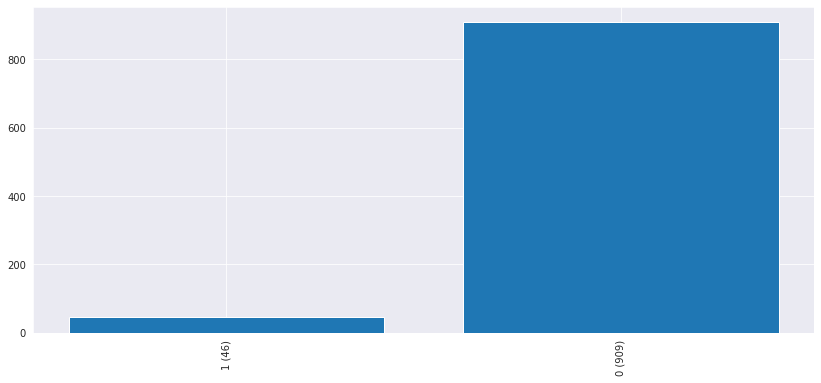

----- Параметр Сахарный диабет -----


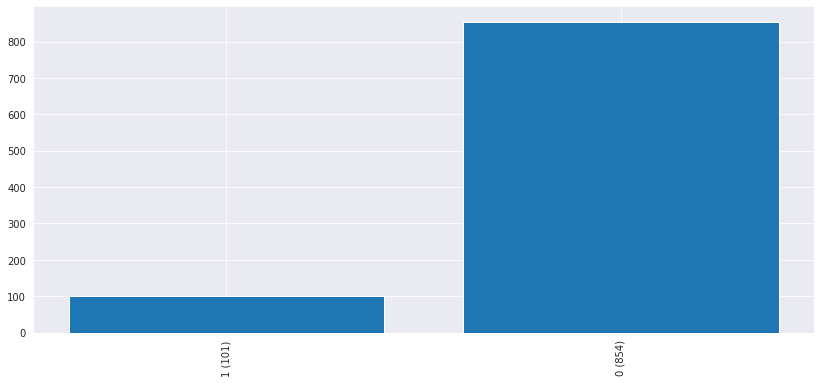

----- Параметр Гепатит -----


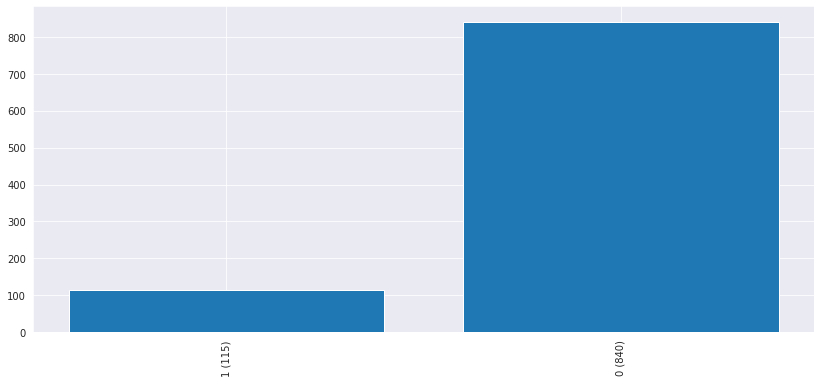

----- Параметр Онкология -----


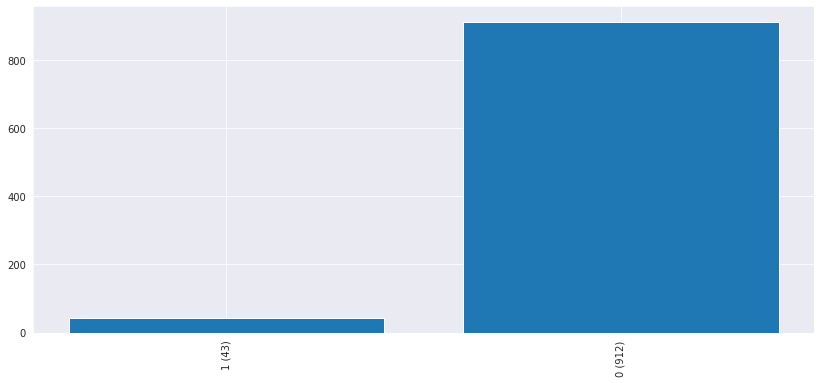

----- Параметр Хроническое заболевание легких -----


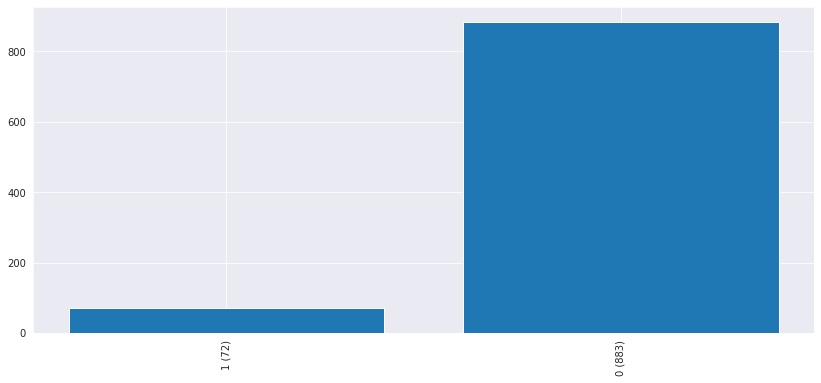

----- Параметр Бронжиальная астма -----


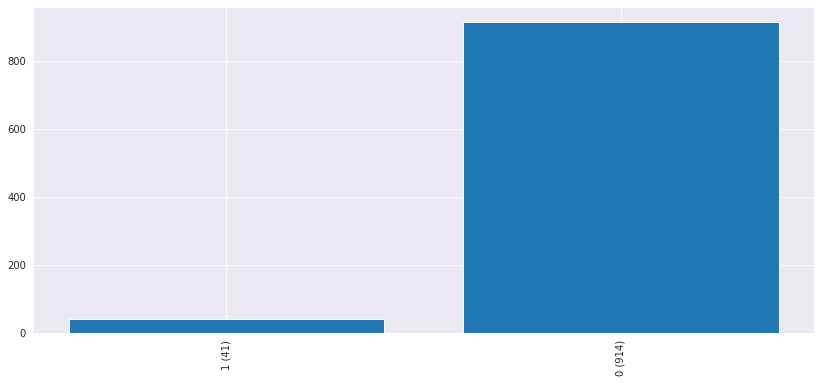

----- Параметр Туберкулез легких  -----


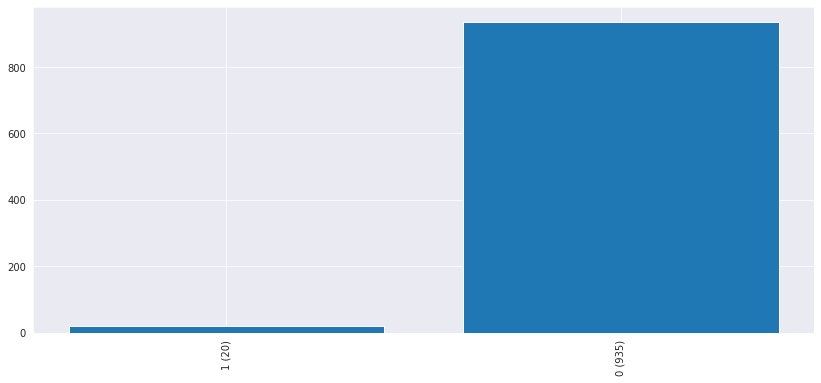

----- Параметр ВИЧ/СПИД -----


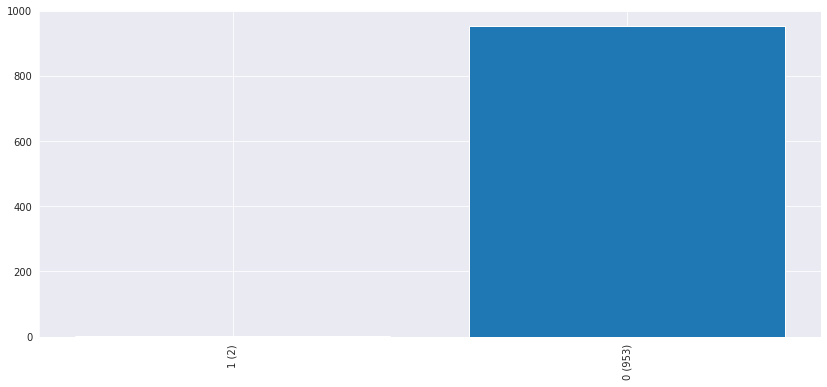

----- Параметр Регулярный прим лекарственных средств -----


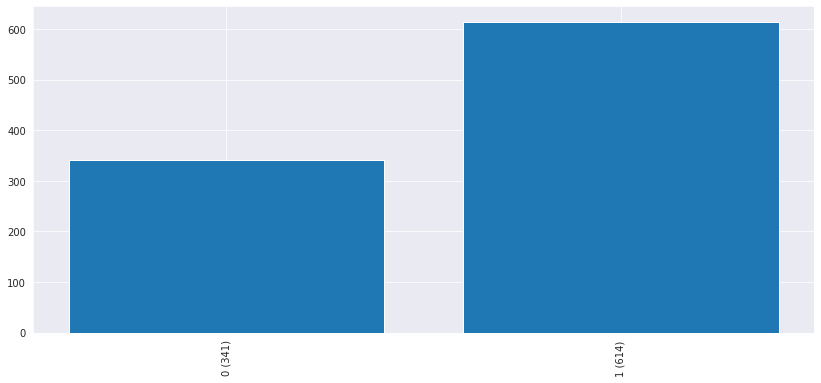

----- Параметр Травмы за год -----


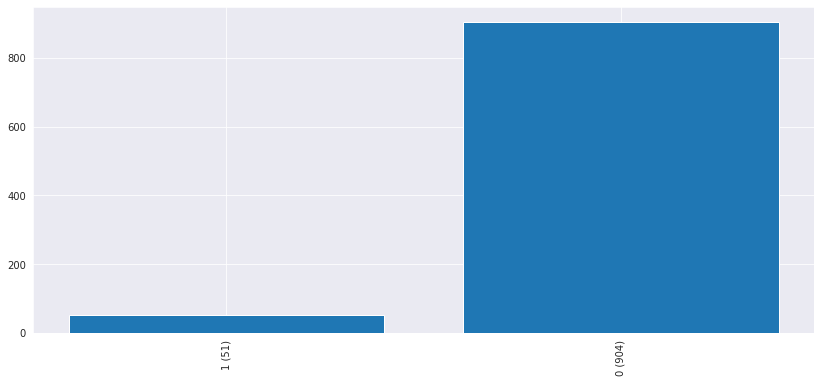

----- Параметр Переломы -----


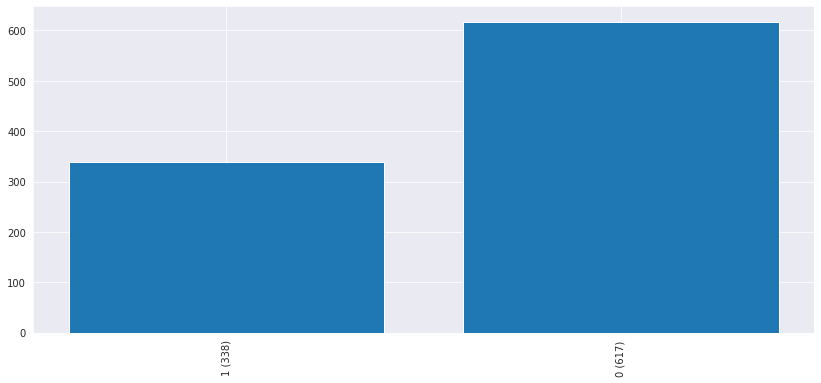

----- Параметр Статус Курения -----


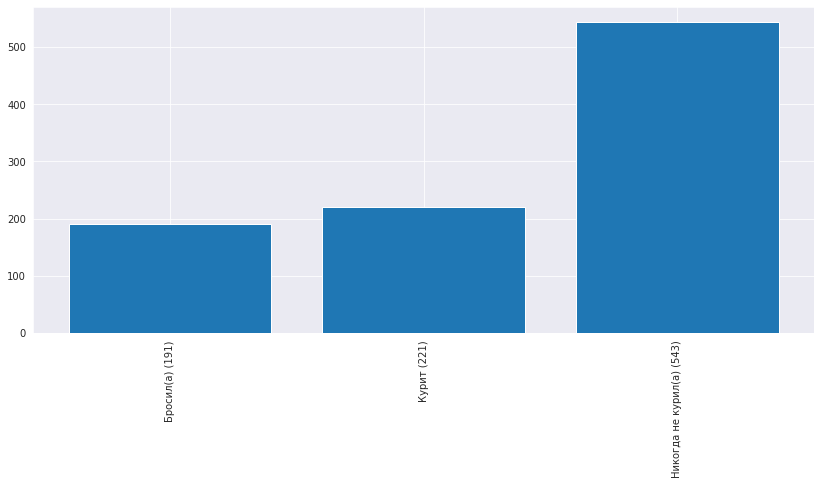

----- Параметр Возраст курения -----


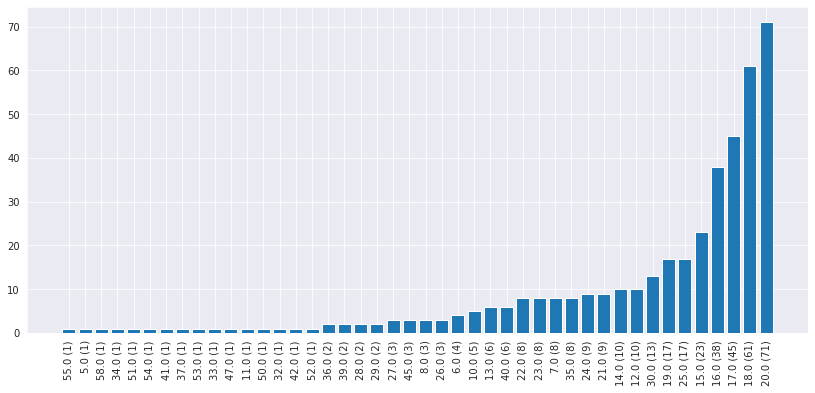

----- Параметр Сигарет в день -----


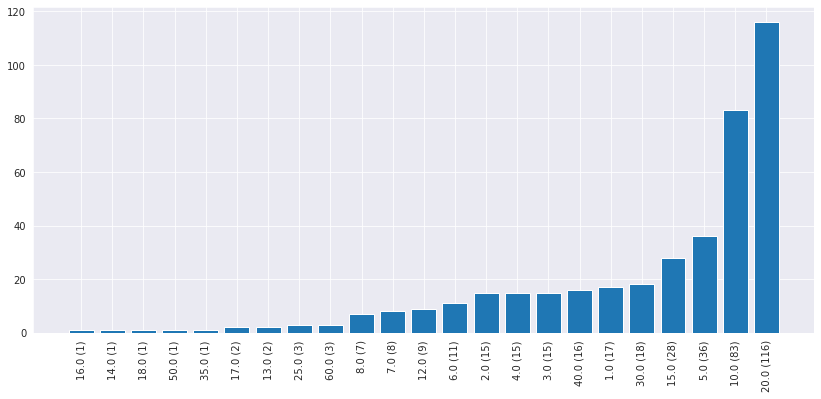

----- Параметр Пассивное курение -----


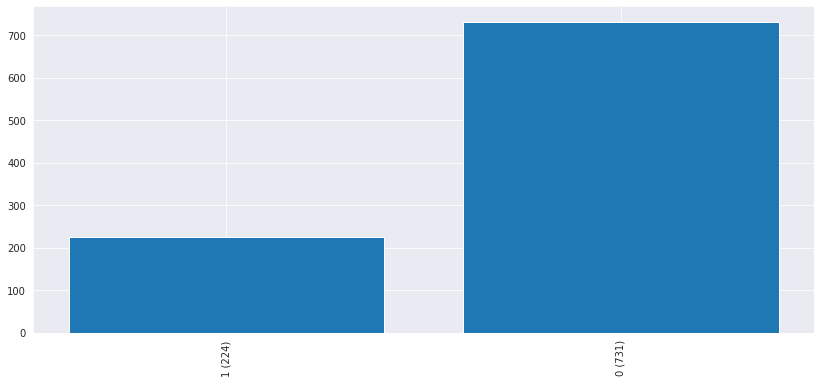

----- Параметр Частота пасс кур -----


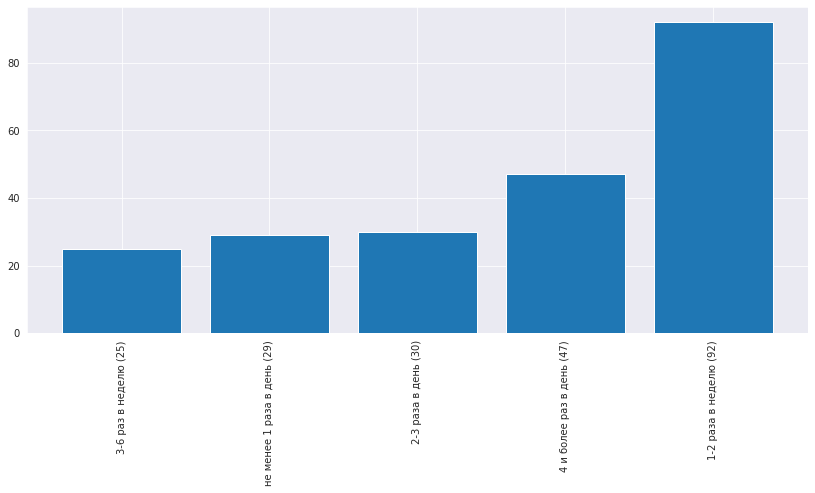

----- Параметр Алкоголь -----


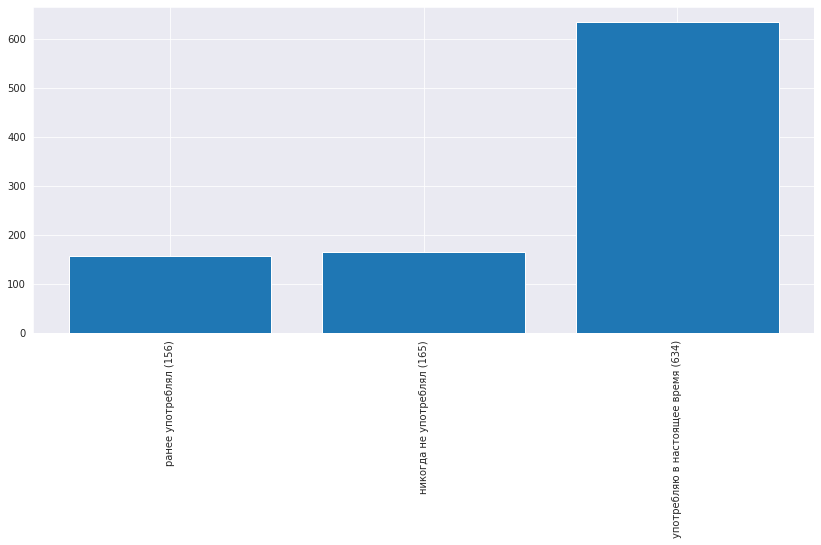

----- Параметр Возраст алког -----


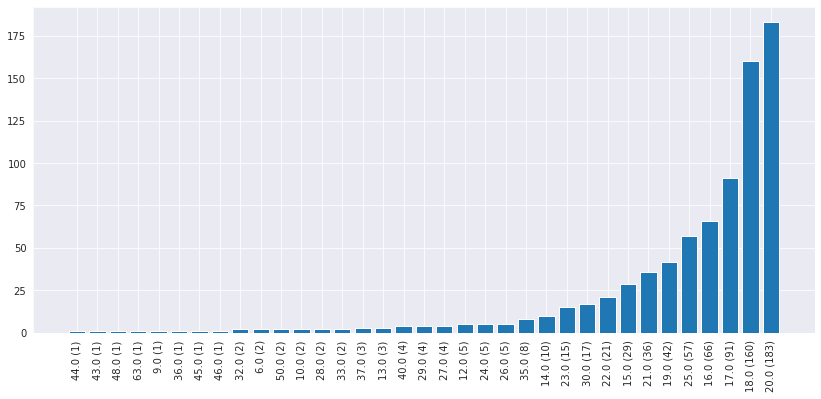

----- Параметр Время засыпания -----


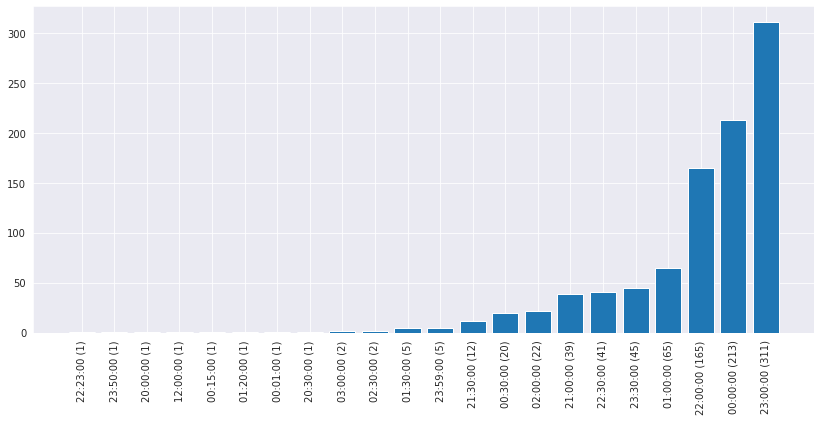

----- Параметр Время пробуждения -----


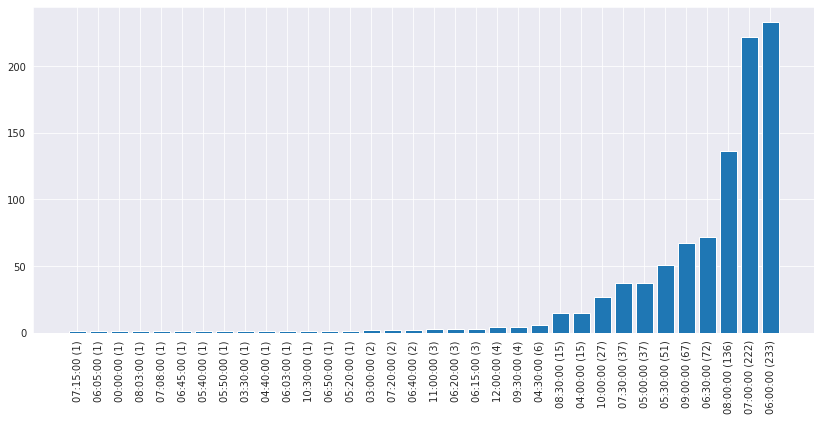

----- Параметр Сон после обеда -----


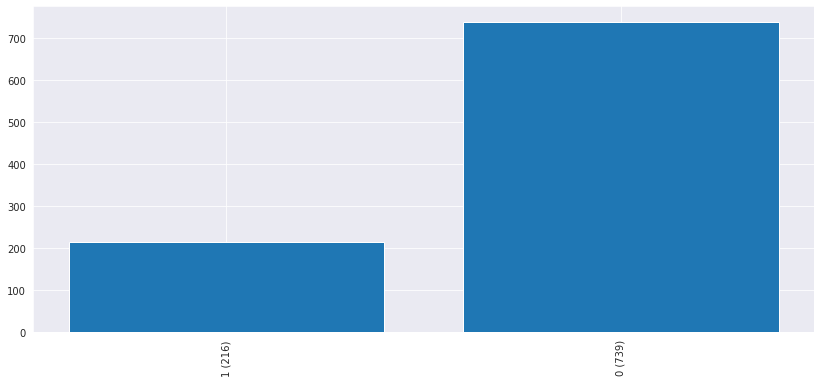

----- Параметр Спорт, клубы -----


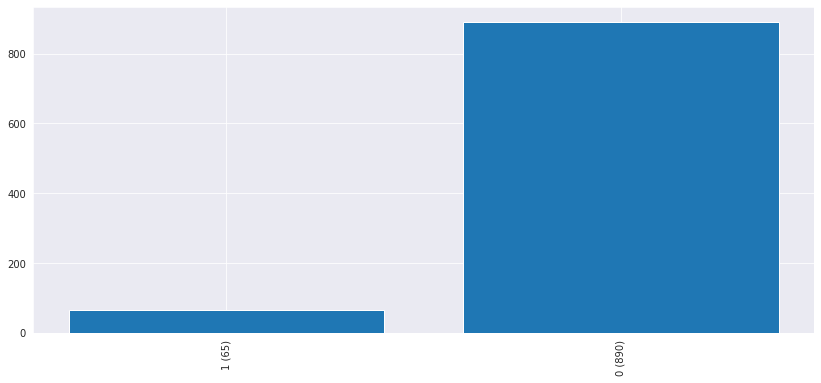

----- Параметр Религия, клубы -----


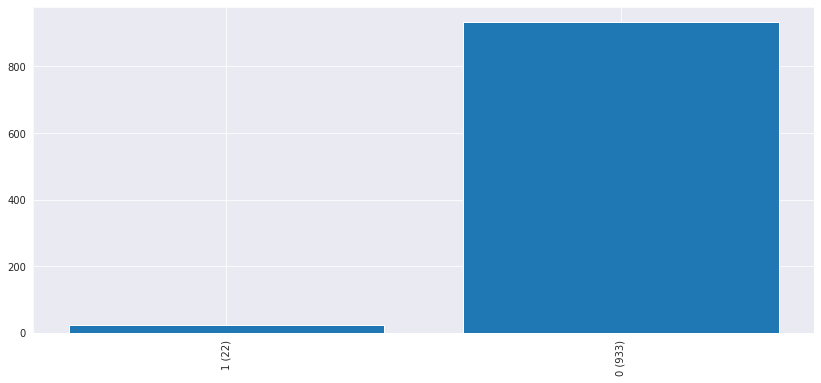

----- Параметр Артериальная гипертензия -----


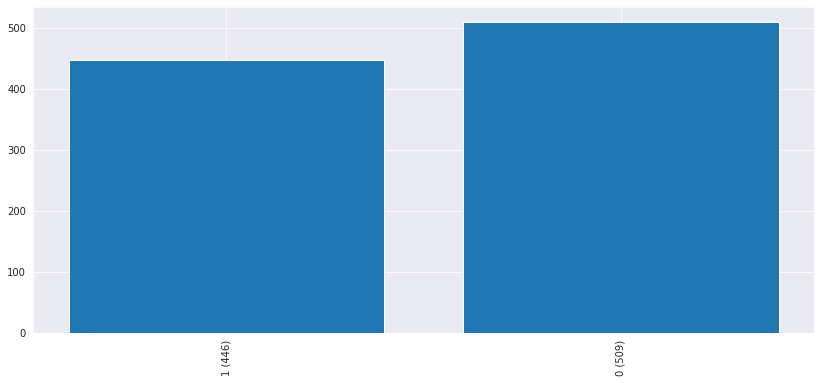

----- Параметр ОНМК -----


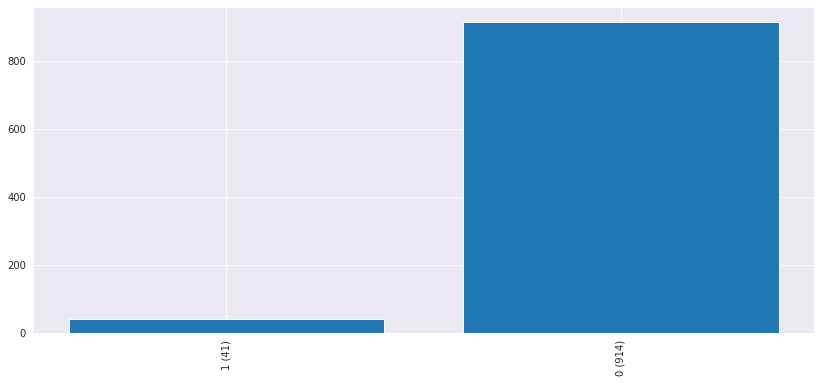

----- Параметр Стенокардия, ИБС, инфаркт миокарда -----


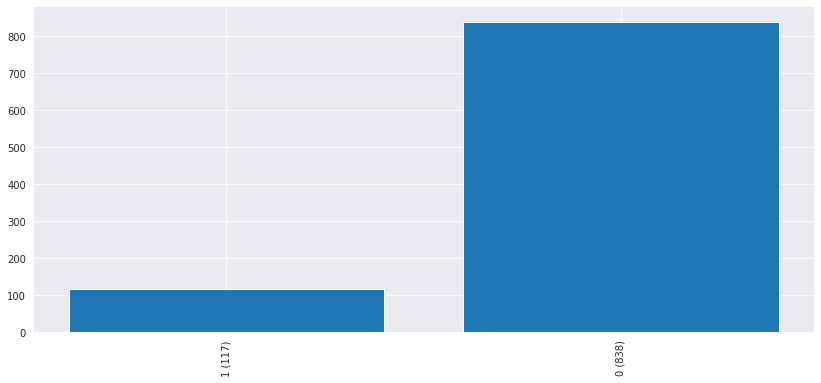

----- Параметр Сердечная недостаточность -----


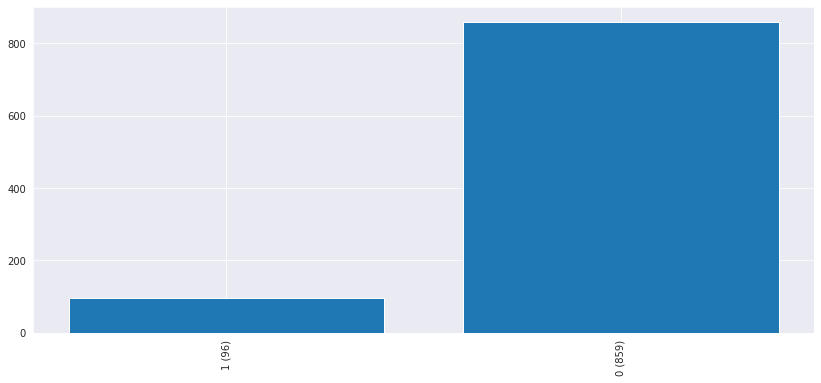

----- Параметр Прочие заболевания сердца -----


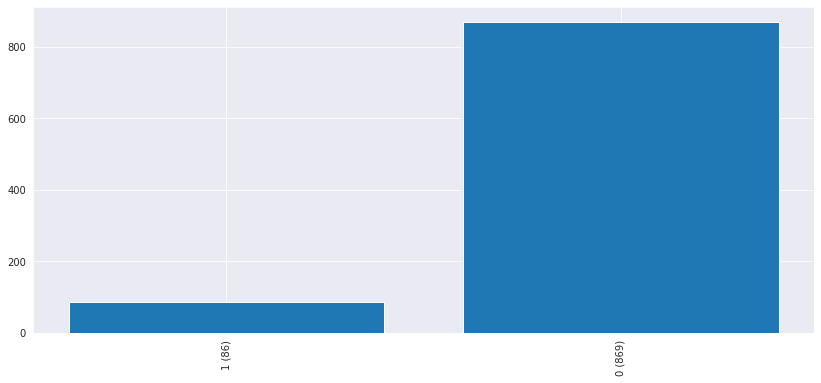

In [ ]:
# Информация о датасете
worker.dataset_info()

In [ ]:
# Оцифровка категориальных признаков
worker.convertToNumeric(["Пол", 'Семья', 'Этнос', 'Национальность', 'Религия', 'Образование', 'Профессия', 'Статус Курения', 'Частота пасс кур', 'Алкоголь', 'Время засыпания', 'Время пробуждения'] )

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,...,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
ID,,,,,,,,,,,,,,,,,,,,,
54-102-358-02,2,0,1,12,3,1,4,1,0,0,...,15,11,0,0,0,0,0,0,0,0
54-103-101-01,1,1,1,12,3,3,2,0,0,0,...,0,3,1,0,0,1,1,0,0,0
54-501-026-03,1,0,1,12,3,3,2,0,0,0,...,18,20,0,0,0,0,0,0,0,0
54-501-094-02,2,0,1,12,0,1,4,1,0,0,...,18,20,0,0,0,1,0,0,0,0
54-503-022-01,1,0,1,12,3,1,5,0,0,1,...,18,11,0,0,0,1,0,1,1,0


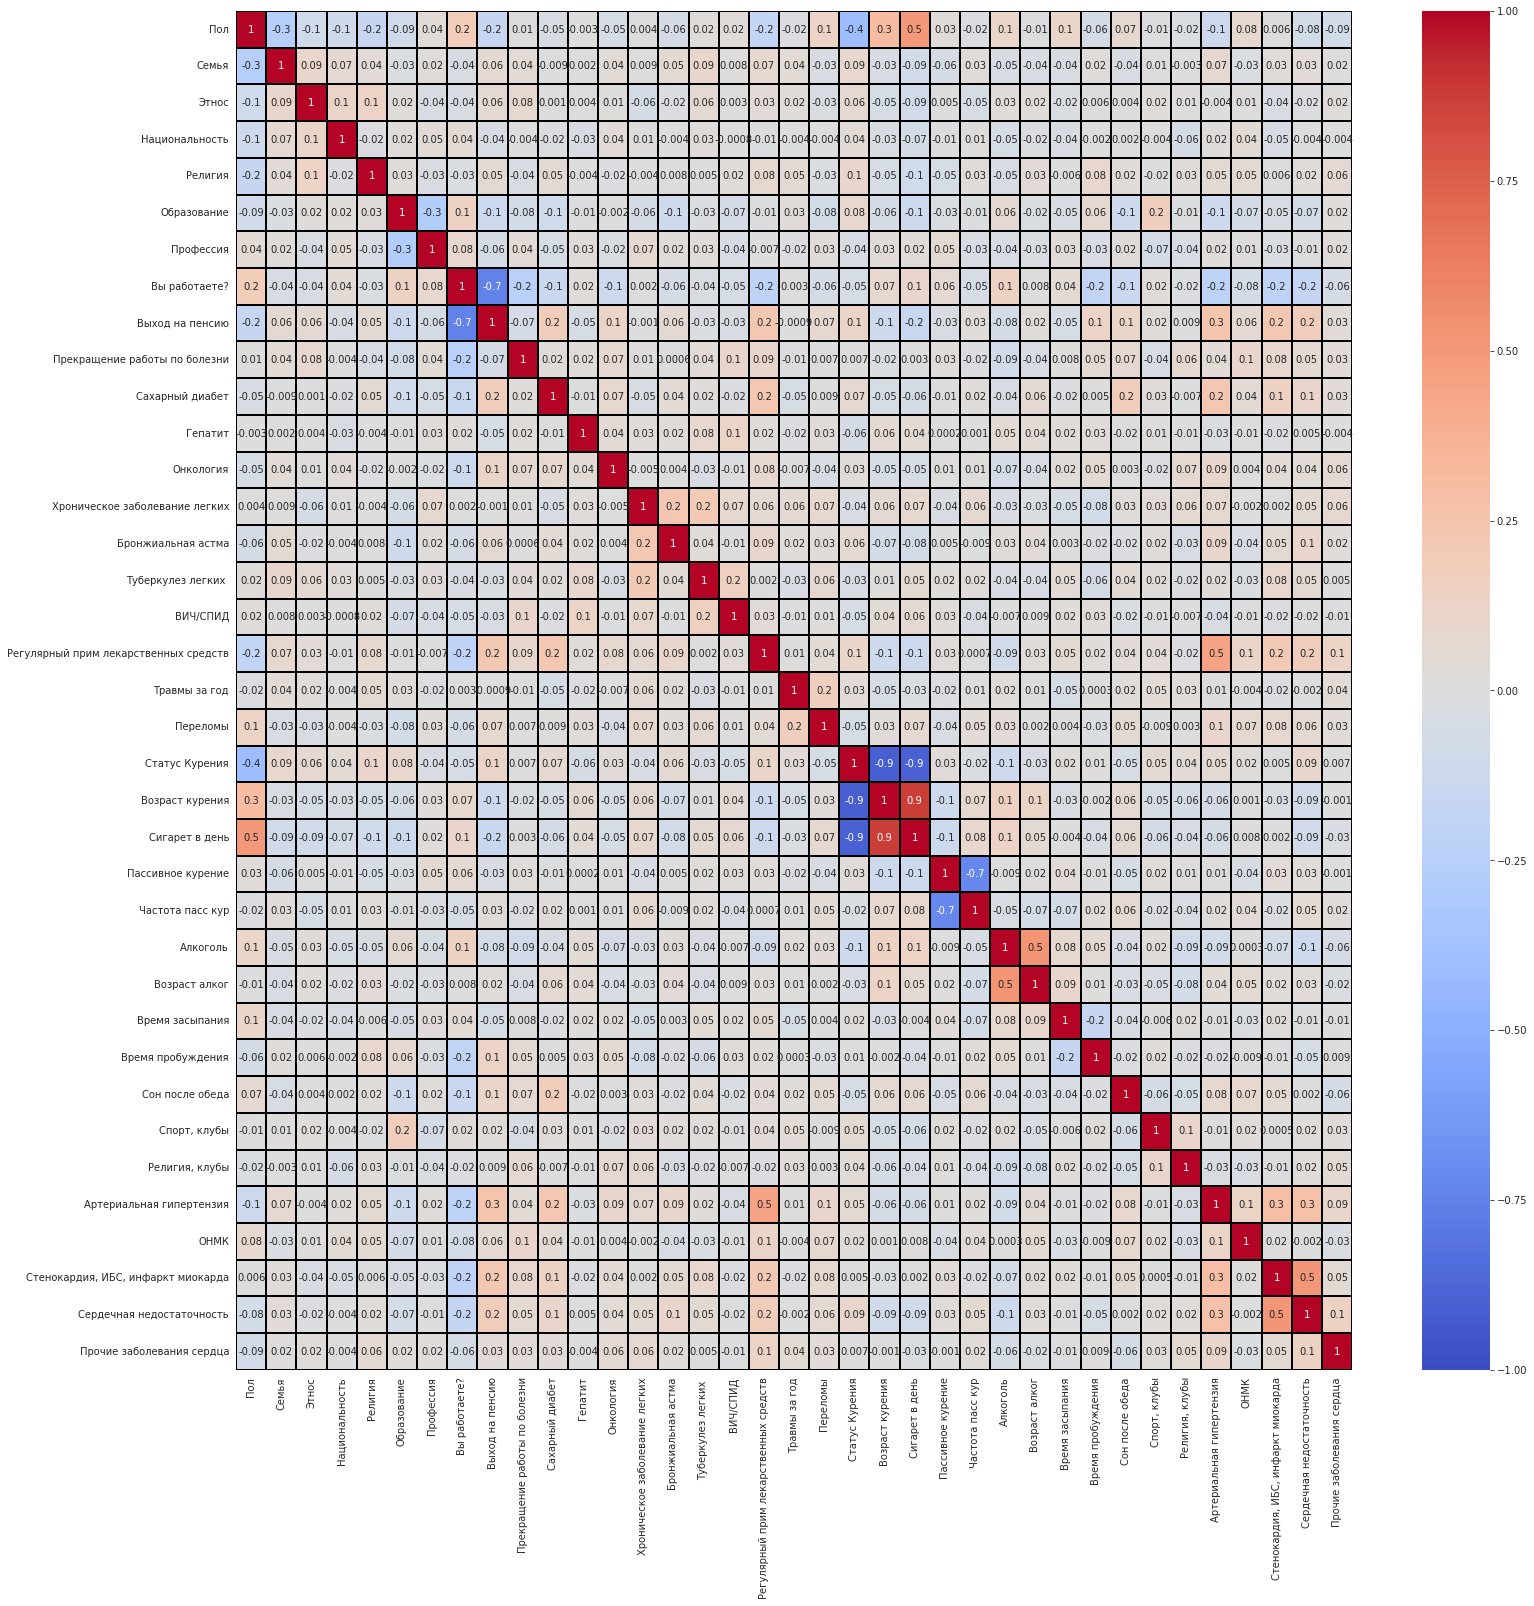

In [ ]:
# Вывод матрицы корреляции
worker.matrix_corr()

In [ ]:
# Создание выборок
worker.create_sets()

Выборки созданы! Размеры:
x_train: (859, 32)
y_train: (859, 5)
x_val: (96, 32)
y_val: (96, 5)


In [ ]:
worker.x_train

array([[2., 0., 1., ..., 1., 0., 0.],
       [1., 2., 1., ..., 0., 0., 0.],
       [2., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [2., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

# Эксперименты

## Autokeras

AutoKeras - это библиотека машинного обучения с открытым исходным кодом, которая обеспечивает автоматический выбор модели и гиперпараметров для различных задач машинного обучения. AutoKeras может использоваться для работы с различными типами данных, включая табличные данные.

Параметры:

- **num_classes** Целое число (int). По умолчанию None. Если None, то оно будет получено из данных.
- **multi_label** bool: Булев тип. По умолчанию установлено значение False.
- **loss** Loss-функция Keras. По умолчанию используется 'binary_crossentropy' или 'categorical_crossentropy' в зависимости от количества классов.
- **metrics** Необязательный параметр, может принимать список метрик Keras, в виде строки, функции или экземпляра метрики, список списков метрик или словарь с именованными метриками. По умолчанию используется метрика 'accuracy'..
- **project_name** str: Строка. Название AutoModel. По умолчанию установлено значение 'image_classifier'.
- **max_trials** int: Целое число. Максимальное количество разных моделей Keras, которые будут протестированы. Поиск может завершиться до достижения максимального количества проб. По умолчанию равен 100.
- **directory** Optional[Union[str, pathlib.Path]]: Это строка. Путь к директории для сохранения результатов поиска. По умолчанию значение None, что создает папку с именем AutoModel в текущей директории.
- **objective** str: String. Название метрики модели для минимизации или максимизации, например, 'val_accuracy'. По умолчанию устанавливается 'val_loss'.
- **tuner** Optional[Union[str, Type[autokeras.engine.tuner.AutoTuner]]]: Строка или подкласс AutoTuner. Если строка, то должна быть одной из 'greedy', 'bayesian', 'hyperband' или 'random'. Она также может быть подклассом AutoTuner. Если не указано, то используется тюнер, специфичный для задачи, который сначала оценивает наиболее часто используемые модели для задачи, прежде чем исследовать другие модели.
- **overwrite** bool: Булевое значение. По умолчанию False. Если False, загружает существующий проект с тем же именем, если такой найден. В противном случае перезаписывает проект.
- **seed** Optional[int]: Это целочисленный параметр, который устанавливает случайное начальное значение для генератора случайных чисел, используемого во время обучения модели. Это позволяет воспроизводить результаты обучения на разных машинах и улучшает воспроизводимость результатов.
- **max_model_size** Целое число. Максимальное количество скалярных параметров в модели. Модели, размер которых превышает это значение, отбрасываются.
- **kwargs**: Этот параметр относится к конструктору AutoModel и позволяет указать любые аргументы, поддерживаемые этим классом. Класс AutoModel является базовым классом для всех поддерживаемых моделей в AutoKeras, таких как ImageClassifier, TextClassifier, StructuredDataClassifier, и другие. Конкретный список аргументов, поддерживаемых AutoModel, зависит от конкретного класса модели, который используется. В общем, аргументы могут включать в себя параметры для слоев, оптимизаторов, регуляризации и других компонентов модели.

Для обучения модели AutoKeras на табличных данных необходимо использовать класс StructuredDataClassifier или StructuredDataRegressor.

In [ ]:
!pip install autokeras
import autokeras as ak

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Эксперимент 1

Параметры по умолчанию

max_trials=40

In [ ]:
clf = ak.StructuredDataClassifier(
    overwrite=True,
    max_trials=40,
    metrics = ['accuracy', Recall(name="recall"), Precision(name="precision")]
)
clf.fit(
    x=worker.x_train,
    y=worker.y_train,
    epochs=100,
    validation_data=(worker.x_val, worker.y_val)
)


Trial 40 Complete [00h 00m 42s]
val_accuracy: 0.7708333134651184

Best val_accuracy So Far: 0.9895833134651184
Total elapsed time: 00h 12m 13s
Epoch 1/100
27/27 [==============================] - 2s 30ms/step - loss: 1.1919 - accuracy: 0.6473 - recall: 0.1094 - precision: 0.5029 - val_loss: 1.0063 - val_accuracy: 0.9792 - val_recall: 0.1818 - val_precision: 0.5000
Epoch 2/100
27/27 [==============================] - 0s 7ms/step - loss: 1.1466 - accuracy: 0.8277 - recall: 0.2271 - precision: 0.5261 - val_loss: 0.9772 - val_accuracy: 0.9792 - val_recall: 0.2727 - val_precision: 0.5250
Epoch 3/100
27/27 [==============================] - 0s 7ms/step - loss: 1.1128 - accuracy: 0.8603 - recall: 0.2764 - precision: 0.5616 - val_loss: 0.9622 - val_accuracy: 0.9688 - val_recall: 0.3377 - val_precision: 0.5909
Epoch 4/100
27/27 [==============================] - 0s 8ms/step - loss: 1.1090 - accuracy: 0.8580 - recall: 0.2906 - precision: 0.5508 - val_loss: 0.9518 - val_accuracy: 0.9688 - val_rec

In [ ]:
# чтобы получить num_models лучших моделей:
best_models = clf.tuner.get_best_models(num_models=2)

In [ ]:
best_models[0].summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 32)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 32)               65        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

## Эксперимент 2

max_trials=30

tuner='bayesian'

Параметр tuner='bayesian' в Autokeras означает использование Байесовской оптимизации для выбора оптимальных гиперпараметров модели. Байесовская оптимизация - это метод оптимизации гиперпараметров, основанный на вероятностном подходе, который позволяет учитывать предыдущие результаты в процессе поиска оптимальных гиперпараметров.

Таким образом, параметр tuner='bayesian' настраивает тюнер на использование Байесовской оптимизации для поиска оптимальных гиперпараметров модели. Этот метод является более эффективным и экономичным по сравнению с жадным алгоритмом, поскольку он позволяет находить оптимальные гиперпараметры с меньшим количеством обучающих примеров и итераций.

Кроме того, Autokeras позволяет настроить параметры Байесовской оптимизации, такие как количество итераций, начальный набор гиперпараметров, функцию оценки и т.д. В целом, параметр tuner='bayesian' в Autokeras позволяет использовать эффективный и точный метод оптимизации гиперпараметров для поиска оптимальной модели машинного обучения.

In [ ]:
clf2 = ak.StructuredDataClassifier(
    overwrite=True, multi_label=False,
    max_trials=30, loss="binary_crossentropy",
    metrics = ['accuracy', Recall(name="recall"), Precision(name="precision")], 
    project_name="heart_diseases", directory="my_dir", seed=88, max_model_size=None, tuner='bayesian', objective ='val_accuracy'
)
clf2.fit(
    x=worker.x_train,
    y=worker.y_train,
    epochs=100,
    validation_data=(worker.x_val, worker.y_val)
)

Trial 30 Complete [00h 00m 33s]
val_accuracy: 0.1458333283662796

Best val_accuracy So Far: 0.9895833134651184
Total elapsed time: 00h 13m 21s
Epoch 1/100
27/27 [==============================] - 3s 26ms/step - loss: 1.8458 - accuracy: 0.3783 - recall: 0.1768 - precision: 0.2560 - val_loss: 1.1556 - val_accuracy: 0.8229 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/100
27/27 [==============================] - 0s 7ms/step - loss: 1.6931 - accuracy: 0.5052 - recall: 0.2595 - precision: 0.3268 - val_loss: 1.0945 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/100
27/27 [==============================] - 0s 6ms/step - loss: 1.5856 - accuracy: 0.6030 - recall: 0.2877 - precision: 0.3750 - val_loss: 1.0824 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/100
27/27 [==============================] - 0s 6ms/step - loss: 1.5083 - accuracy: 0.6088 - recall: 0.2962 - precision: 0.3903 - val_loss: 1.0843 - val_ac

In [ ]:
# чтобы получить num_models лучших моделей:
best_models2 = clf2.tuner.get_best_models(num_models=3)

In [ ]:
best_models2[0].summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 32)               0         
 ltiCategoryEncoding)                                            
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 16)                0         
                                                                 
 dropout (Dropout)           (None, 16)                0     

In [ ]:
best_models2[1].summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 32)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 32)               65        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                             

In [ ]:
best_models2[2].summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 32)               0         
 ltiCategoryEncoding)                                            
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 re_lu (ReLU)                (None, 16)                0         
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                             

In [ ]:
# Оцениваем лучшую модель с использованием тестовых данных.
print(clf2.evaluate(worker.x_val, worker.y_val))

3/3 [==============================] - 2s 11ms/step - loss: 0.9884 - accuracy: 0.9792 - recall: 0.4416 - precision: 0.5000
[0.9883825182914734, 0.9791666865348816, 0.44155845046043396, 0.5]


## Эксперимент 3

max_trials=20

tuner='greedy'

Параметр tuner='greedy' в Autokeras означает использование жадного алгоритма для выбора оптимальных гиперпараметров модели. Это означает, что при каждом шаге подбора гиперпараметров выбирается наилучший вариант, и дальнейший поиск осуществляется на основе этого варианта. Таким образом, данный параметр настраивает тюнер на использование жадного алгоритма для быстрого и эффективного поиска оптимальных гиперпараметров.

Параметр tuner в Autokeras также может быть установлен на другие значения, такие как 'bayesian', 'random', 'hyperband' и т.д., которые определяют другие методы подбора оптимальных гиперпараметров модели. Каждый из этих методов имеет свои преимущества и недостатки в зависимости от задачи и набора данных, поэтому выбор наиболее подходящего метода зависит от конкретных условий.

In [ ]:
clf3 = ak.StructuredDataClassifier(
    overwrite=True, multi_label=False,
    max_trials=20, loss="binary_crossentropy",
    metrics = ['accuracy', Recall(name="recall"), Precision(name="precision")], 
    project_name="heart_diseases3", directory="my_dir", seed=88, max_model_size=None, tuner='greedy', objective ='val_accuracy'
)
clf3.fit(
    x=worker.x_train,
    y=worker.y_train,
    epochs=50,
    validation_data=(worker.x_val, worker.y_val)
)

Trial 20 Complete [00h 00m 14s]
val_accuracy: 0.9791666865348816

Best val_accuracy So Far: 0.9791666865348816
Total elapsed time: 00h 04m 56s
Epoch 1/50
27/27 [==============================] - 2s 24ms/step - loss: 1.9862 - accuracy: 0.3504 - recall: 0.2150 - precision: 0.3263 - val_loss: 1.3149 - val_accuracy: 0.9062 - val_recall: 0.2987 - val_precision: 0.4510
Epoch 2/50
27/27 [==============================] - 0s 5ms/step - loss: 1.4279 - accuracy: 0.6729 - recall: 0.2454 - precision: 0.3955 - val_loss: 1.1351 - val_accuracy: 0.8333 - val_recall: 0.2987 - val_precision: 0.5349
Epoch 3/50
27/27 [==============================] - 0s 5ms/step - loss: 1.2801 - accuracy: 0.7229 - recall: 0.2609 - precision: 0.4302 - val_loss: 1.0702 - val_accuracy: 0.8958 - val_recall: 0.2987 - val_precision: 0.5227
Epoch 4/50
27/27 [==============================] - 0s 5ms/step - loss: 1.2310 - accuracy: 0.7404 - recall: 0.2793 - precision: 0.4430 - val_loss: 1.0359 - val_accuracy: 0.9375 - val_recall:

In [ ]:
# чтобы получить num_models лучших моделей:
best_models3 = clf3.tuner.get_best_models(num_models=3)

In [ ]:
best_models3[0].summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 32)               0         
 ltiCategoryEncoding)                                            
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 re_lu_1 (ReLU)              (None, 32)                0         
                                                             

In [ ]:
best_models3[1].summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 32)               0         
 ltiCategoryEncoding)                                            
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                             

In [ ]:
best_models3[2].summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 32)               0         
 ltiCategoryEncoding)                                            
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1024)              33792     
                                                                 
 re_lu_1 (ReLU)              (None, 1024)              0         
                                                             

# Датасет с изображениями

## Загрузка датасета и подготовка выборок

In [ ]:
#@title Загрузка датасета и подготовка выборок
# Работа с массивами
import numpy as np

# Генератор аугментированных изображений
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Подключение модуля для загрузки данных из облака
import gdown

# Инструменты для работы с файлами
import os

# Отрисовка графиков
import matplotlib.pyplot as plt

# Рисование графиков в ячейках Colab
%matplotlib inline

In [ ]:
# Загрузка zip-архива с датасетом из облака на диск виртуальной машины colab
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l5/middle_fmr.zip', None, quiet=True)

'middle_fmr.zip'

In [ ]:
# Задание гиперпараметров

TRAIN_PATH          = '/content/cars'       # Папка для обучающего набора данных
TEST_PATH           = '/content/cars_test'  # Папка для тестового набора данных

TEST_SPLIT          = 0.1                   # Доля тестовых данных в общем наборе
VAL_SPLIT           = 0.2                   # Доля проверочной выборки в обучающем наборе

IMG_WIDTH           = 128                   # Ширина изображения для нейросети
IMG_HEIGHT          = 64                    # Высота изображения для нейросети
IMG_CHANNELS        = 3                     # Количество каналов (для RGB равно 3, для Grey равно 1)

# Параметры аугментации
ROTATION_RANGE      = 8                     # Пределы поворота
WIDTH_SHIFT_RANGE   = 0.15                  # Пределы сдвига по горизонтали
HEIGHT_SHIFT_RANGE  = 0.15                  # Пределы сдвига по вертикали
ZOOM_RANGE          = 0.15                  # Пределы увеличения/уменьшения
BRIGHTNESS_RANGE    = (0.7, 1.3)            # Пределы изменения яркости
HORIZONTAL_FLIP     = True                  # Горизонтальное отражение разрешено

In [ ]:
# Очистка данных от прошлого запуска (если есть)
!rm -rf {TRAIN_PATH} {TEST_PATH}

# Разархивация датасета в директорию данных
!unzip -qo "middle_fmr.zip" -d {TRAIN_PATH}

In [ ]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(TRAIN_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 3, метки классов: ['Ferrari', 'Mercedes', 'Renault']


In [ ]:
# Перенос файлов для теста в отдельное дерево папок, расчет размеров наборов данных

os.mkdir(TEST_PATH)                                        # Создание папки для тестовых данных
train_count = 0
test_count = 0

for class_name in CLASS_LIST:                              # Для всех классов по порядку номеров (их меток)
    class_path = f'{TRAIN_PATH}/{class_name}'              # Формирование полного пути к папке с изображениями класса
    test_path = f'{TEST_PATH}/{class_name}'                # Полный путь для тестовых данных класса
    class_files = os.listdir(class_path)                   # Получение списка имен файлов с изображениями текущего класса
    class_file_count = len(class_files)                    # Получение общего числа файлов класса
    os.mkdir(test_path)                                    # Создание подпапки класса для тестовых данных
    test_file_count = int(class_file_count * TEST_SPLIT)   # Определение числа тестовых файлов для класса
    test_files = class_files[-test_file_count:]            # Выделение файлов для теста от конца списка
    for f in test_files:                                   # Перемещение тестовых файлов в папку для теста
        os.rename(f'{class_path}/{f}', f'{test_path}/{f}')
    train_count += class_file_count                        # Увеличение общего счетчика файлов обучающего набора
    test_count += test_file_count                          # Увеличение общего счетчика файлов тестового набора

    print(f'Размер класса {class_name}: {class_file_count} машин, для теста выделено файлов: {test_file_count}')

print(f'Общий размер базы: {train_count}, выделено для обучения: {train_count - test_count}, для теста: {test_count}')

Размер класса Ferrari: 1088 машин, для теста выделено файлов: 108
Размер класса Mercedes: 1161 машин, для теста выделено файлов: 116
Размер класса Renault: 1178 машин, для теста выделено файлов: 117
Общий размер базы: 3427, выделено для обучения: 3086, для теста: 341


In [ ]:
# Генераторы изображений

# Изображения для обучающего набора нормализуются и аугментируются согласно заданным гиперпараметрам
# Далее набор будет разделен на обучающую и проверочную выборку в соотношении VAL_SPLIT
train_datagen = ImageDataGenerator(
                    rescale=1. / 255.,
                    rotation_range=ROTATION_RANGE,
                    width_shift_range=WIDTH_SHIFT_RANGE,
                    height_shift_range=HEIGHT_SHIFT_RANGE,
                    zoom_range=ZOOM_RANGE,
                    brightness_range=BRIGHTNESS_RANGE,
                    horizontal_flip=HORIZONTAL_FLIP,
                    validation_split=VAL_SPLIT
                )

# Изображения для тестового набора только нормализуются
test_datagen = ImageDataGenerator(
                   rescale=1. / 255.
                )

In [ ]:
# Обучающая выборка генерируется из папки обучающего набора
train_generator = train_datagen.flow_from_directory(
    # Путь к обучающим изображениям
    TRAIN_PATH,
    # Параметры требуемого размера изображения
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    # Размер батча
    batch_size=24,
    class_mode='categorical',
    shuffle=True,
    # Указание сгенерировать обучающую выборку
    subset='training'
)

# Проверочная выборка также генерируется из папки обучающего набора
validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=24,
    class_mode='categorical',
    shuffle=True,
    # Указание сгенерировать проверочную выборку
    subset='validation'
)

# Тестовая выборка генерируется из папки тестового набора
test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=test_count,
    class_mode='categorical',
    shuffle=True,
)

Found 2469 images belonging to 3 classes.
Found 617 images belonging to 3 classes.
Found 341 images belonging to 3 classes.


In [ ]:
# Проверка формы данных
print(f'Формы данных тренировочной выборки: {train_generator[0][0].shape}, {train_generator[0][1].shape}, батчей: {len(train_generator)}')
print(f'Формы данных   проверочной выборки: {validation_generator[0][0].shape}, {validation_generator[0][1].shape}, батчей: {len(validation_generator)}')
print(f'Формы данных      тестовой выборки: {test_generator[0][0].shape}, {test_generator[0][1].shape}, батчей: {len(test_generator)}')

print()

# Проверка назначения меток классов
print(f'Метки классов тренировочной выборки: {train_generator.class_indices}')
print(f'Метки классов   проверочной выборки: {validation_generator.class_indices}')
print(f'Метки классов      тестовой выборки: {test_generator.class_indices}')

Формы данных тренировочной выборки: (24, 64, 128, 3), (24, 3), батчей: 103
Формы данных   проверочной выборки: (24, 64, 128, 3), (24, 3), батчей: 26
Формы данных      тестовой выборки: (341, 64, 128, 3), (341, 3), батчей: 1

Метки классов тренировочной выборки: {'Ferrari': 0, 'Mercedes': 1, 'Renault': 2}
Метки классов   проверочной выборки: {'Ferrari': 0, 'Mercedes': 1, 'Renault': 2}
Метки классов      тестовой выборки: {'Ferrari': 0, 'Mercedes': 1, 'Renault': 2}


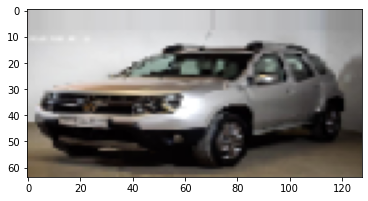

In [ ]:
# Проверка одного изображения из выборки
plt.imshow(train_generator[1][0][2])
plt.show()

In [ ]:
# Функция рисования образцов изображений из заданной выборки

def show_batch(batch,                # батч с примерами
               img_range=range(20),  # диапазон номеров картинок
               figsize=(25, 8),      # размер полотна для рисования одной строки таблицы
               columns=5             # число колонок в таблице
               ):

    for i in img_range:
        ix = i % columns
        if ix == 0:
            fig, ax = plt.subplots(1, columns, figsize=figsize)
        class_label = np.argmax(batch[1][i])
        ax[ix].set_title(CLASS_LIST[class_label])
        ax[ix].imshow(batch[0][i])  
        ax[ix].axis('off')
        plt.tight_layout()

    plt.show()

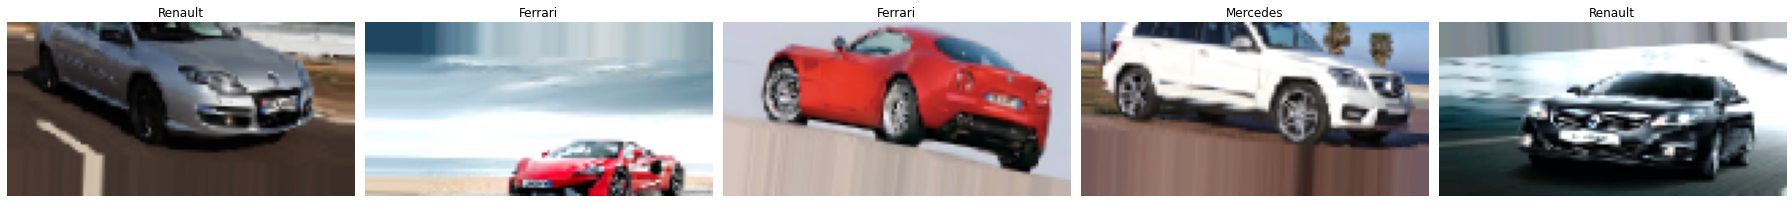

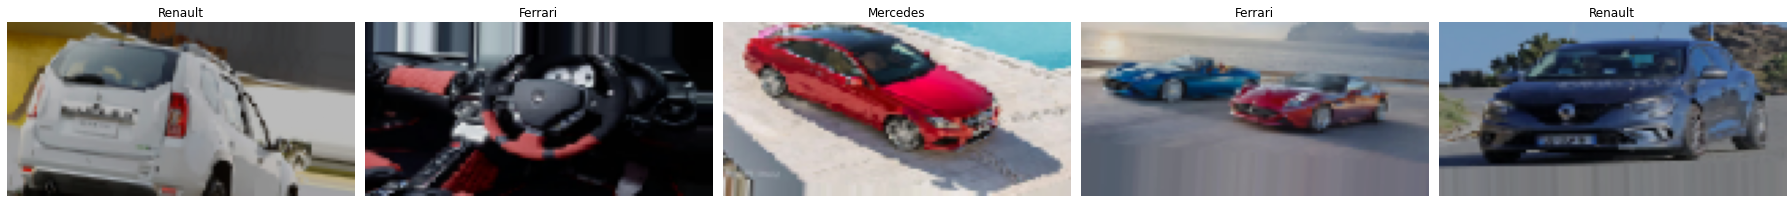

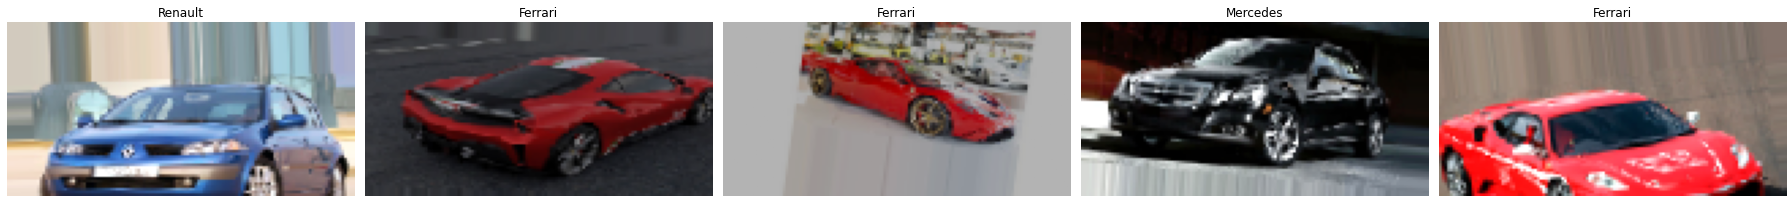

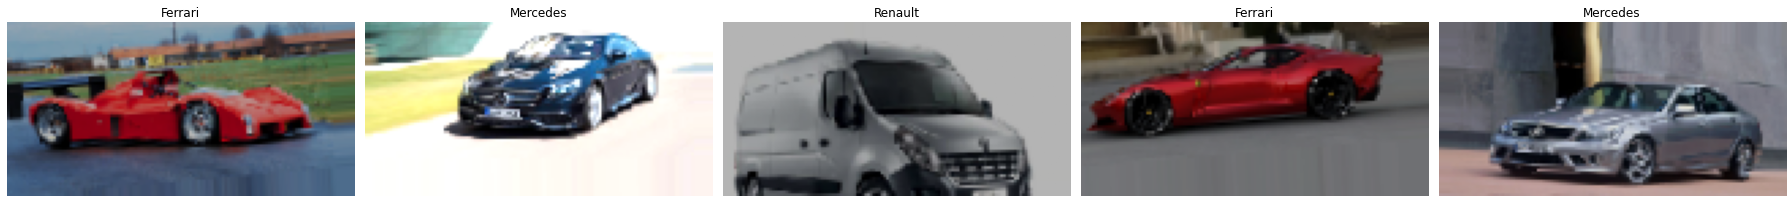

In [ ]:
# Вывод примеров из 0-го батча train_generator
show_batch(train_generator[0])

In [ ]:
# Получение всех данных из генератора
data = []
labels = []
for batch in train_generator:
    data.append(batch[0])
    labels.append(batch[1])
    if len(data) * 32 >= len(train_generator.filenames):
        break

# Преобразование данных и меток в numpy массивы
x = np.concatenate(data)
y = np.concatenate(labels)

In [ ]:
# Получение всех данных из генератора
data = []
labels = []
for batch in validation_generator:
    data.append(batch[0])
    labels.append(batch[1])
    if len(data) * 32 >= len(validation_generator.filenames):
        break

# Преобразование данных и меток в numpy массивы
x_val = np.concatenate(data)
y_val = np.concatenate(labels)

In [ ]:
# Получение всех данных из генератора
data = []
labels = []
for batch in test_generator:
    data.append(batch[0])
    labels.append(batch[1])
    if len(data) * 32 >= len(test_generator.filenames):
        break

# Преобразование данных и меток в numpy массивы
x_test = np.concatenate(data)
y_test = np.concatenate(labels)

## Эксперимент 1

max_trials=5

tuner greedy

По умолчанию в Autokeras используется Greedy tuner. Этот метод является простым и быстрым, и выбирает наилучшие значения гиперпараметров из небольшого набора возможных значений.

Greedy tuner имеет ограниченные возможности для оптимизации гиперпараметров, поэтому может не достигать наилучшего результата в некоторых случаях. Однако, он хорошо подходит для быстрого прототипирования моделей и поиска начальных значений гиперпараметров, которые можно затем использовать в других Tuner'ах.

In [ ]:
from keras.callbacks import EarlyStopping

# Определение EarlyStopping-коллбека
es_callback = EarlyStopping(monitor='val_loss', patience=4)
clf = ak.ImageClassifier(overwrite=True, max_trials=5, multi_label=False, loss="categorical_crossentropy", metrics=['accuracy'], 
                         project_name="cars_1", tuner='greedy', directory="my_dir", seed=88, objective ='val_accuracy')

# Обучаем модель
clf.fit(x, y, epochs=10, validation_data=(x_val, y_val))


Trial 5 Complete [00h 05m 07s]
val_accuracy: 0.4729166626930237

Best val_accuracy So Far: 0.5479166507720947
Total elapsed time: 00h 20m 15s
Epoch 1/10
59/59 [==============================] - 52s 346ms/step - loss: 3.5678 - accuracy: 0.4022 - val_loss: 1.4030 - val_accuracy: 0.3250
Epoch 2/10
59/59 [==============================] - 21s 350ms/step - loss: 1.2001 - accuracy: 0.5021 - val_loss: 1.4069 - val_accuracy: 0.3250
Epoch 3/10
59/59 [==============================] - 19s 325ms/step - loss: 1.0348 - accuracy: 0.5657 - val_loss: 1.6825 - val_accuracy: 0.3250
Epoch 4/10
59/59 [==============================] - 19s 325ms/step - loss: 1.3579 - accuracy: 0.5598 - val_loss: 1.3905 - val_accuracy: 0.3500
Epoch 5/10
59/59 [==============================] - 19s 326ms/step - loss: 1.6567 - accuracy: 0.5150 - val_loss: 6.0165 - val_accuracy: 0.3292
Epoch 6/10
59/59 [==============================] - 19s 327ms/step - loss: 1.5472 - accuracy: 0.5331 - val_loss: 1.3428 - val_accuracy: 0.4062


In [ ]:
print("Training accuracy:", clf.evaluate(x, y)[1])
print("Test accuracy:", clf.evaluate(x_test, y_test)[1])

59/59 [==============================] - 7s 92ms/step - loss: 153.4128 - accuracy: 0.3611
Training accuracy: 0.3611111044883728
118/118 [==============================] - 13s 97ms/step - loss: 189.1275 - accuracy: 0.3490
Test accuracy: 0.3489736020565033


In [ ]:
# чтобы получить num_models лучших моделей:
best_models = clf.tuner.get_best_models(num_models=3)

In [ ]:
best_models[0].summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 128, 3)]      0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 64, 128, 3)       0         
 t32)                                                            
                                                                 
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 3)                 6147  

In [ ]:
best_models[1].summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 128, 3)]      0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 64, 128, 3)       0         
 t32)                                                            
                                                                 
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 3)                 6147  

In [ ]:
best_models[2].summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 128, 3)]      0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 64, 128, 3)       0         
 t32)                                                            
                                                                 
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 3)                 6147  

## Эксперимент 2

max_trials=10

tuner random

In [ ]:
from keras.callbacks import EarlyStopping
# Обучение модели
# Определение EarlyStopping-коллбека
es_callback = EarlyStopping(monitor='val_loss', patience=4)
clf2 = ak.ImageClassifier(overwrite=True, max_trials=10, multi_label=False, tuner='random', loss="categorical_crossentropy", metrics=['accuracy'], 
                         project_name="cars_2", directory="my_dir", seed=88, max_model_size=None, objective ='val_accuracy')
# Обучаем 10  моделей
clf2.fit(x, y, epochs=10, validation_data=(x_val, y_val), callbacks=[es_callback])


Trial 10 Complete [00h 04m 10s]
val_accuracy: 0.32499998807907104

Best val_accuracy So Far: 0.53125
Total elapsed time: 00h 40m 10s


In [ ]:
print("Training accuracy:", clf2.evaluate(x, y)[1])
print("Test accuracy:", clf2.evaluate(x_test, y_test)[1])

59/59 [==============================] - 5s 71ms/step - loss: 0.5525 - accuracy: 0.7804
Training accuracy: 0.7804487347602844
118/118 [==============================] - 10s 72ms/step - loss: 1.0187 - accuracy: 0.5748
Test accuracy: 0.5747800469398499


In [ ]:
# чтобы получить num_models лучших моделей:
best_models2 = clf2.tuner.get_best_models(num_models=3)

In [ ]:
best_models2[0].summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 128, 3)]      0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 64, 128, 3)       0         
 t32)                                                            
                                                                 
 separable_conv2d (Separable  (None, 62, 126, 512)     2075      
 Conv2D)                                                         
                                                                 
 separable_conv2d_1 (Separab  (None, 60, 124, 512)     267264    
 leConv2D)                                                       
                                                                 
 flatten (Flatten)           (None, 3809280)           0         
                                                             

In [ ]:
best_models2[1].summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 128, 3)]      0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 64, 128, 3)       0         
 t32)                                                            
                                                                 
 random_translation (RandomT  (None, 64, 128, 3)       0         
 ranslation)                                                     
                                                                 
 random_flip (RandomFlip)    (None, 64, 128, 3)        0         
                                                                 
 random_contrast (RandomCont  (None, 64, 128, 3)       0         
 rast)                                                           
                                                             

In [ ]:
best_models2[2].summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 128, 3)]      0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 64, 128, 3)       0         
 t32)                                                            
                                                                 
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 resnet152 (Functional)      (None, 7, 7, 2048)        58370944  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 dropout (Dropout)           (None, 2048)              0     

## Эксперимент 3

max_trials=10

tuner bayesian

**tuner bayesian** использует байесовский подход для оптимизации гиперпараметров модели. В отличие от тюнера RandomSearch, который выбирает случайные значения гиперпараметров из заданных диапазонов, тюнер Bayesian строит модель на основе предыдущих результатов настройки и использует ее для определения наиболее перспективных значений гиперпараметров для следующей итерации.

In [ ]:
clf_4 = ak.ImageClassifier(overwrite=True, max_trials=10, num_classes=3, multi_label=False, loss="categorical_crossentropy", metrics=["accuracy"], 
                         project_name="my_project", directory="my_dir", seed=44, max_model_size=None, tuner='bayesian', objective ='val_accuracy')
# Обучаем 10  моделей
clf_4.fit(x, y, epochs=10, batch_size=64, validation_data=(x_val, y_val))


Trial 10 Complete [00h 01m 35s]
val_accuracy: 0.33125001192092896

Best val_accuracy So Far: 0.6291666626930237
Total elapsed time: 00h 40m 49s


Epoch 1/10


30/30 [==============================] - 37s 895ms/step - loss: 2.3396 - accuracy: 0.4113 - val_loss: 1.3584 - val_accuracy: 0.5396
Epoch 2/10
30/30 [==============================] - 24s 813ms/step - loss: 1.5921 - accuracy: 0.5433 - val_loss: 1.3065 - val_accuracy: 0.5813
Epoch 3/10
30/30 [==============================] - 25s 841ms/step - loss: 1.3956 - accuracy: 0.5833 - val_loss: 1.2366 - val_accuracy: 0.6146
Epoch 4/10
30/30 [==============================] - 24s 797ms/step - loss: 1.2250 - accuracy: 0.6485 - val_loss: 1.2678 - val_accuracy: 0.6042
Epoch 5/10
30/30 [==============================] - 25s 849ms/step - loss: 1.0826 - accuracy: 0.6619 - val_loss: 1.2245 - val_accuracy: 0.6146
Epoch 6/10
30/30 [==============================] - 24s 812ms/step - loss: 0.9664 - accuracy: 0.6854 - val_loss: 1.2210 - val_accuracy: 0.6292
Epoch 7/10
30/30 [==============================] - 24s 804ms/step - loss: 0.9574 - accuracy: 0.6918 - val_loss: 1.1948 - val_accuracy: 0.6354
Epoch 8/10

In [ ]:
print("Training accuracy:", clf_4.evaluate(x, y)[1])
print("Test accuracy:", clf_4.evaluate(x_test, y_test)[1])

59/59 [==============================] - 17s 221ms/step - loss: 0.3339 - accuracy: 0.8697
Training accuracy: 0.8696581125259399


118/118 [==============================] - 32s 238ms/step - loss: 0.8636 - accuracy: 0.7038
Test accuracy: 0.703812301158905


In [ ]:
# чтобы получить num_models лучших моделей:
best_models3 = clf_4.tuner.get_best_models(num_models=3)

In [ ]:
best_models3[0].summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 128, 3)]      0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 64, 128, 3)       0         
 t32)                                                            
                                                                 
 random_contrast (RandomCont  (None, 64, 128, 3)       0         
 rast)                                                           
                                                                 
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 resnet152v2 (Functional)    (None, None, None, 2048)  58331648  
                                                                 
 flatten (Flatten)           (None, 100352)            0     

## Эксперимент 4

max_trials=3

tuner по умолчанию

Так как в данном эксперименте используются предобученные модели, некоторые из которых несовместимы с текущей версией tensorflow, приходится "откатывать" актуальную версию tensorflow до совместимой.

In [ ]:
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.11.0
Uninstalling tensorflow-2.11.0:
  Successfully uninstalled tensorflow-2.11.0


In [ ]:
!pip install tensorflow==2.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 26.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully unin

In [ ]:
!pip uninstall tensorflow-text -y

Found existing installation: tensorflow-text 2.9.0
Uninstalling tensorflow-text-2.9.0:
  Successfully uninstalled tensorflow-text-2.9.0


In [ ]:
!pip install tensorflow-text==2.9.0

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [ ]:
clf4 = ak.ImageClassifier(overwrite=True, max_trials=3, multi_label=False, loss="categorical_crossentropy", metrics=['accuracy'], 
                         project_name="cars_4", directory="my_dir", seed=90, max_model_size=None, objective ='val_accuracy')
# Обучаем 3  модели
clf4.fit(x, y, epochs=10, validation_data=(x_val, y_val))

Trial 3 Complete [00h 22m 51s]
val_accuracy: 0.831250011920929

Best val_accuracy So Far: 0.831250011920929
Total elapsed time: 00h 29m 24s


Epoch 1/10


Not enough memory, reduce batch size to 16.
Epoch 1/10
117/117 [==============================] - 122s 1s/step - loss: 0.9485 - accuracy: 0.5556 - val_loss: 1.0758 - val_accuracy: 0.4000
Epoch 2/10
117/117 [==============================] - 118s 1s/step - loss: 0.6507 - accuracy: 0.7484 - val_loss: 1.0371 - val_accuracy: 0.4354
Epoch 3/10
117/117 [==============================] - 120s 1s/step - loss: 0.4383 - accuracy: 0.8403 - val_loss: 0.9583 - val_accuracy: 0.4979
Epoch 4/10
117/117 [==============================] - 119s 1s/step - loss: 0.2936 - accuracy: 0.9033 - val_loss: 0.8118 - val_accuracy: 0.6333
Epoch 5/10
117/117 [==============================] - 119s 1s/step - loss: 0.2045 - accuracy: 0.9375 - val_loss: 0.5725 - val_accuracy: 0.7500
Epoch 6/10
117/117 [==============================] - 120s 1s/step - loss: 0.1494 - accuracy: 0.9557 - val_loss: 0.4891 - val_accuracy: 0.8021
Epoch 7/10
117/117 [==============================] - 119s 1s/step - loss: 0.1028 - accuracy: 0.97

In [ ]:
# чтобы получить num_models лучших моделей:
best_models4 = clf4.tuner.get_best_models(num_models=3)

In [ ]:
best_models4[0].summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 128, 3)]      0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 64, 128, 3)       0         
 t32)                                                            
                                                                 
 normalization (Normalizatio  (None, 64, 128, 3)       7         
 n)                                                              
                                                                 
 random_translation (RandomT  (None, 64, 128, 3)       0         
 ranslation)                                                     
                                                                 
 random_flip (RandomFlip)    (None, 64, 128, 3)        0         
                                                             

# Эксперименты без использования AutoKeras

### Табличные данные

#### **Эксп. №1 (0.61)**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(16, input_dim=32, activation='relu'))
  model.add(Dense(5, activation='sigmoid'))

  model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=metrics)
  # Компиляция модели
  return model

model = create_model()

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(worker.x_train,
                           worker.y_train,
                           validation_data=(worker.x_val, worker.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=30, 
                           verbose=1)

Epoch 1/30
35/35 [==============================] - 1s 12ms/step - loss: 1.6728 - accuracy: 0.5402 - recall: 0.7151 - precision: 0.2001 - val_loss: 0.9694 - val_accuracy: 0.5938 - val_recall: 0.6234 - val_precision: 0.2096
Epoch 2/30
35/35 [==============================] - 0s 3ms/step - loss: 0.7847 - accuracy: 0.7008 - recall: 0.5416 - precision: 0.2706 - val_loss: 0.5197 - val_accuracy: 0.7292 - val_recall: 0.4416 - val_precision: 0.3953
Epoch 3/30
35/35 [==============================] - 0s 3ms/step - loss: 0.5662 - accuracy: 0.6764 - recall: 0.3639 - precision: 0.3505 - val_loss: 0.4545 - val_accuracy: 0.7917 - val_recall: 0.3506 - val_precision: 0.4426
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 0.5008 - accuracy: 0.7544 - recall: 0.3131 - precision: 0.3598 - val_loss: 0.4273 - val_accuracy: 0.8438 - val_recall: 0.3247 - val_precision: 0.4630
Epoch 5/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4654 - accuracy: 0.7928 - recall: 0.3

График обучения:


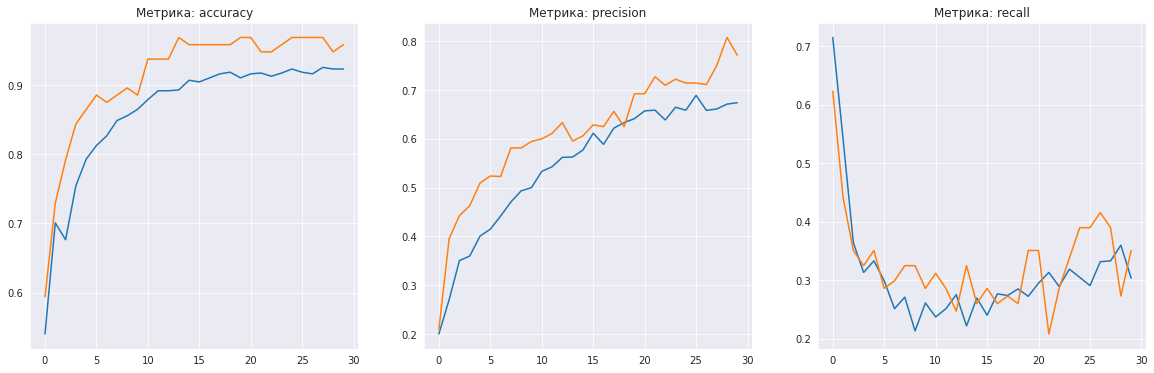

Максимальная точность на обучающей выборке: 0.925
Максимальная точность на проверочной выборке: 0.969
Максимальная метрика precision  на обучающей выборке: 0.689
Максимальная метрика precision  на проверочной выборке: 0.808
Максимальная метрика recall на обучающей выборке: 0.715
Максимальная метрика recall на проверочной выборке: 0.623


In [ ]:
worker.show_learning_information(store_learning)

**Несколько запусков**

In [ ]:
worker.train_model(
    funcModel=create_model,
    count=10)

Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.467
Максимальная метрика precision на проверочной выборке: 0.0

Максимальная метрика recall на обучающей выборке: 0.387
Максимальная метрика recall на проверочной выборке: 0.0




Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.767
Максимальная метрика precision на проверочной выборке: 0.0

Максимальная метрика recall на обучающей выборке: 0.38
Максимальная метрика recall на проверочной выборке: 0.0




Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.466
Максимальная метрика precision на проверочной выборке: 0.0

М

#### **Эксп. №2 (добавление BatchNormalization+Dropout) (0.61)**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(16, input_dim=32, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(5, activation='sigmoid'))

  model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=metrics)
  # Компиляция модели
  return model

model = create_model()

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(worker.x_train,
                           worker.y_train,
                           validation_data=(worker.x_val, worker.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=30, 
                           verbose=1)

Epoch 1/30
35/35 [==============================] - 2s 23ms/step - loss: 0.7854 - accuracy: 0.2584 - recall: 0.4288 - precision: 0.1719 - val_loss: 1.4707 - val_accuracy: 0.0521 - val_recall: 0.6623 - val_precision: 0.1266
Epoch 2/30
35/35 [==============================] - 0s 5ms/step - loss: 0.7314 - accuracy: 0.2806 - recall: 0.4528 - precision: 0.1828 - val_loss: 0.9397 - val_accuracy: 0.1146 - val_recall: 0.5974 - val_precision: 0.1353
Epoch 3/30
35/35 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.2794 - recall: 0.3865 - precision: 0.1849 - val_loss: 0.7225 - val_accuracy: 0.1875 - val_recall: 0.4935 - val_precision: 0.1704
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 0.6331 - accuracy: 0.3038 - recall: 0.3709 - precision: 0.2206 - val_loss: 0.6273 - val_accuracy: 0.2396 - val_recall: 0.3896 - val_precision: 0.1935
Epoch 5/30
35/35 [==============================] - 0s 5ms/step - loss: 0.5901 - accuracy: 0.3644 - recall: 0.3

График обучения:


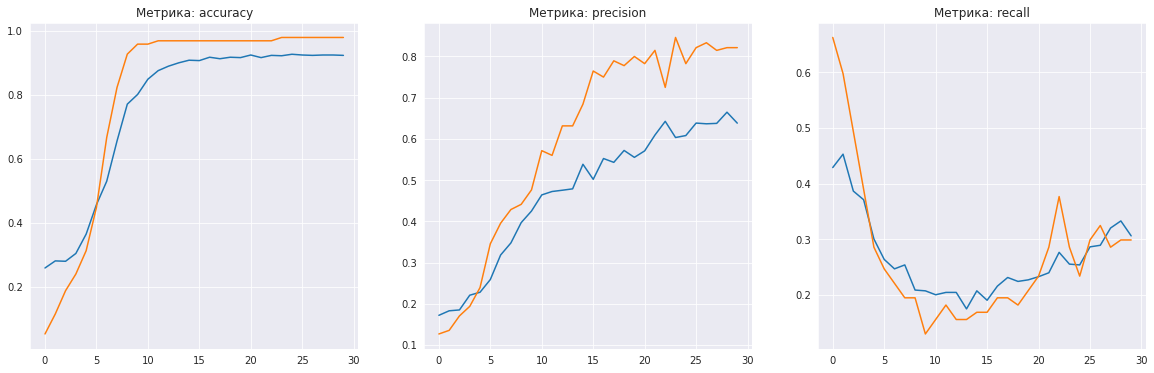

Максимальная точность на обучающей выборке: 0.927
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 0.665
Максимальная метрика precision  на проверочной выборке: 0.846
Максимальная метрика recall на обучающей выборке: 0.453
Максимальная метрика recall на проверочной выборке: 0.662


In [ ]:
worker.show_learning_information(store_learning)

**Несколько запусков**

In [ ]:
worker.train_model(
    funcModel=create_model,
    count=10)

Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.476
Максимальная метрика precision на проверочной выборке: 0.49

Максимальная метрика recall на обучающей выборке: 0.522
Максимальная метрика recall на проверочной выборке: 0.61




Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.473
Максимальная метрика precision на проверочной выборке: 0.49

Максимальная метрика recall на обучающей выборке: 0.345
Максимальная метрика recall на проверочной выборке: 0.61




Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.656
Максимальная метрика precision на проверочной выборке: 0

#### **Эксп. №3 (добавление Dense) (0.623)**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(16, input_dim=32, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=metrics)

  # Компиляция модели
  return model

model = create_model()

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(worker.x_train,
                           worker.y_train,
                           validation_data=(worker.x_val, worker.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=30, 
                           verbose=1)

Epoch 1/30
35/35 [==============================] - 2s 13ms/step - loss: 0.6590 - accuracy: 0.1944 - recall: 0.3053 - precision: 0.1934 - val_loss: 0.6190 - val_accuracy: 0.0208 - val_recall: 0.0130 - val_precision: 0.0303
Epoch 2/30
35/35 [==============================] - 0s 3ms/step - loss: 0.5162 - accuracy: 0.5285 - recall: 0.1975 - precision: 0.2911 - val_loss: 0.4490 - val_accuracy: 0.5521 - val_recall: 0.0130 - val_precision: 0.2500
Epoch 3/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.7893 - recall: 0.1749 - precision: 0.3987 - val_loss: 0.4056 - val_accuracy: 0.9792 - val_recall: 0.1039 - val_precision: 0.7273
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.8847 - recall: 0.1721 - precision: 0.4729 - val_loss: 0.3892 - val_accuracy: 0.9792 - val_recall: 0.1818 - val_precision: 0.7368
Epoch 5/30
35/35 [==============================] - 0s 4ms/step - loss: 0.3934 - accuracy: 0.9104 - recall: 0.1

График обучения:


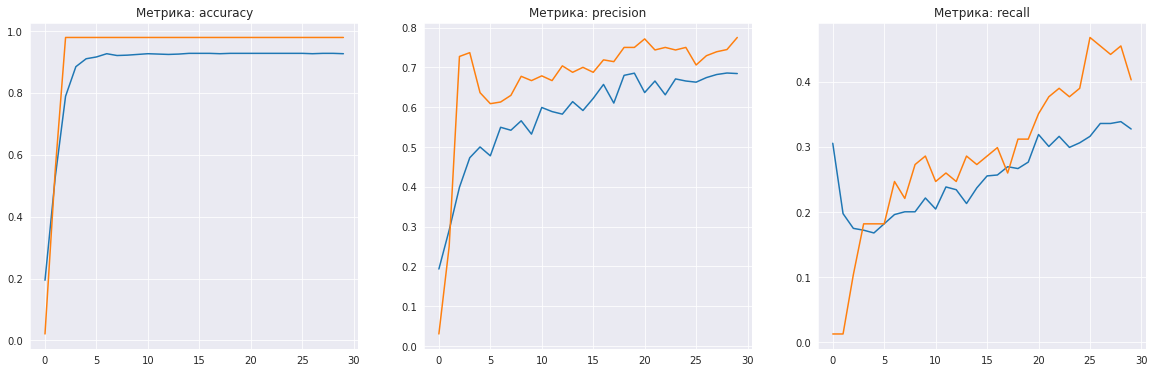

Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 0.686
Максимальная метрика precision  на проверочной выборке: 0.775
Максимальная метрика recall на обучающей выборке: 0.339
Максимальная метрика recall на проверочной выборке: 0.468


In [ ]:
worker.show_learning_information(store_learning)

**Несколько запусков**

In [ ]:
worker.train_model(
    funcModel=create_model,
    count=10)

Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.703
Максимальная метрика precision на проверочной выборке: 0.85

Максимальная метрика recall на обучающей выборке: 0.444
Максимальная метрика recall на проверочной выборке: 0.61




Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.725
Максимальная метрика precision на проверочной выборке: 0.789

Максимальная метрика recall на обучающей выборке: 0.408
Максимальная метрика recall на проверочной выборке: 0.506




Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.706
Максимальная метрика precision на проверочной выборке:

#### **Эксп. №4 (Увеличение нейронов в первом Dense) (0.636)**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(128, input_dim=32, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=metrics)

  # Компиляция модели
  return model

model = create_model()

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(worker.x_train,
                           worker.y_train,
                           validation_data=(worker.x_val, worker.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=30, 
                           verbose=1)

Epoch 1/30
35/35 [==============================] - 2s 14ms/step - loss: 0.6737 - accuracy: 0.1676 - recall: 0.2583 - precision: 0.1545 - val_loss: 0.5208 - val_accuracy: 0.4375 - val_recall: 0.2727 - val_precision: 0.2530
Epoch 2/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4598 - accuracy: 0.6298 - recall: 0.1890 - precision: 0.3976 - val_loss: 0.3959 - val_accuracy: 0.9167 - val_recall: 0.2987 - val_precision: 0.6053
Epoch 3/30
35/35 [==============================] - 0s 4ms/step - loss: 0.4007 - accuracy: 0.8382 - recall: 0.2299 - precision: 0.5525 - val_loss: 0.3730 - val_accuracy: 0.9792 - val_recall: 0.3506 - val_precision: 0.6923
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 0.3812 - accuracy: 0.8789 - recall: 0.2468 - precision: 0.5932 - val_loss: 0.3645 - val_accuracy: 0.9792 - val_recall: 0.3506 - val_precision: 0.6750
Epoch 5/30
35/35 [==============================] - 0s 3ms/step - loss: 0.3698 - accuracy: 0.8836 - recall: 0.2

График обучения:


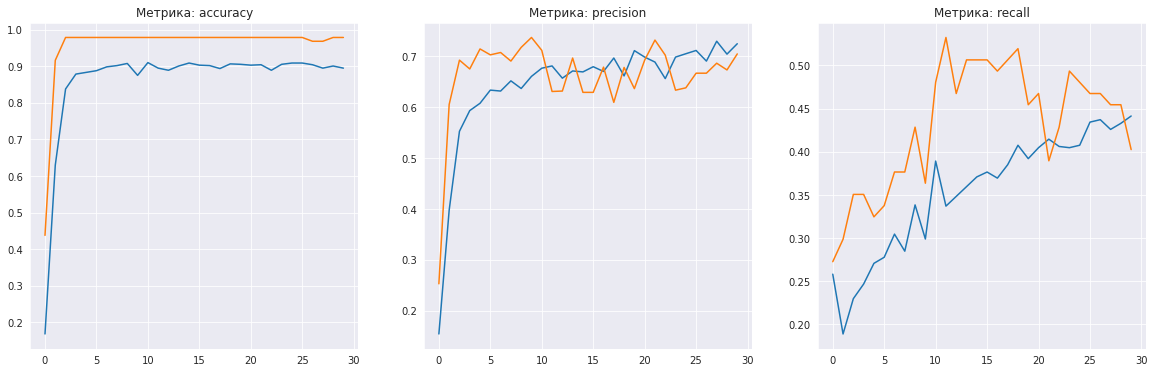

Максимальная точность на обучающей выборке: 0.91
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 0.729
Максимальная метрика precision  на проверочной выборке: 0.737
Максимальная метрика recall на обучающей выборке: 0.441
Максимальная метрика recall на проверочной выборке: 0.532


In [ ]:
worker.show_learning_information(store_learning)

**Несколько запусков**

In [ ]:
worker.train_model(
    funcModel=create_model,
    count=10)

Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 0.919
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.763
Максимальная метрика precision на проверочной выборке: 0.781

Максимальная метрика recall на обучающей выборке: 0.496
Максимальная метрика recall на проверочной выборке: 0.468




Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 0.922
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.759
Максимальная метрика precision на проверочной выборке: 0.88

Максимальная метрика recall на обучающей выборке: 0.526
Максимальная метрика recall на проверочной выборке: 0.532




Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 0.922
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.74
Максимальная метрика precision на проверочной выборке:

#### **Эксп. №5 (Добавление Dense) (0.753)**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(128, input_dim=32, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=metrics)

  # Компиляция модели
  return model

model = create_model()

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(worker.x_train,
                           worker.y_train,
                           validation_data=(worker.x_val, worker.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=30, 
                           verbose=1)

Epoch 1/30
35/35 [==============================] - 2s 13ms/step - loss: 0.7181 - accuracy: 0.2119 - recall: 0.4440 - precision: 0.1788 - val_loss: 0.6689 - val_accuracy: 0.5417 - val_recall: 0.6234 - val_precision: 0.2182
Epoch 2/30
35/35 [==============================] - 0s 3ms/step - loss: 0.6289 - accuracy: 0.3620 - recall: 0.4443 - precision: 0.2191 - val_loss: 0.6069 - val_accuracy: 0.4688 - val_recall: 0.5844 - val_precision: 0.2632
Epoch 3/30
35/35 [==============================] - 0s 4ms/step - loss: 0.5268 - accuracy: 0.5076 - recall: 0.4090 - precision: 0.3142 - val_loss: 0.4877 - val_accuracy: 0.5104 - val_recall: 0.4156 - val_precision: 0.3404
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4505 - accuracy: 0.6438 - recall: 0.3032 - precision: 0.3853 - val_loss: 0.4159 - val_accuracy: 0.8542 - val_recall: 0.2987 - val_precision: 0.5750
Epoch 5/30
35/35 [==============================] - 0s 4ms/step - loss: 0.3989 - accuracy: 0.8033 - recall: 0.2

График обучения:


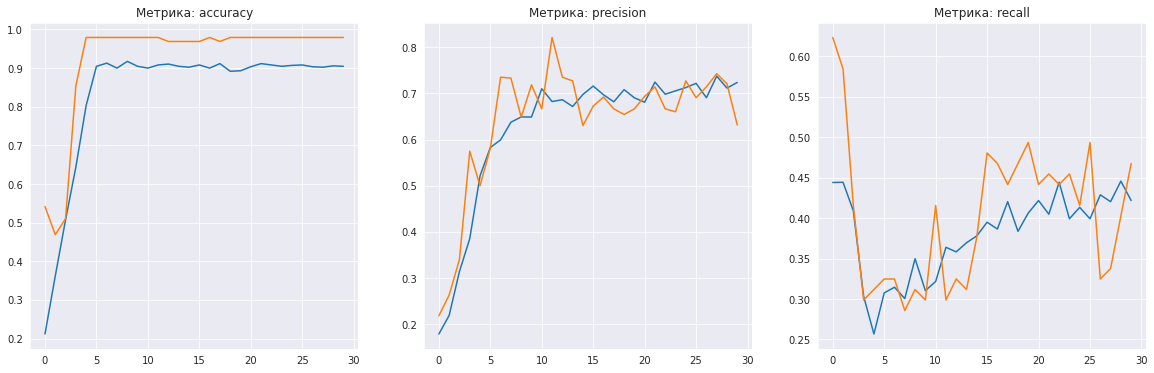

Максимальная точность на обучающей выборке: 0.917
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 0.738
Максимальная метрика precision  на проверочной выборке: 0.821
Максимальная метрика recall на обучающей выборке: 0.446
Максимальная метрика recall на проверочной выборке: 0.623


In [ ]:
worker.show_learning_information(store_learning)

**Несколько запусков**

In [ ]:
worker.train_model(
    funcModel=create_model,
    count=10)

Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 0.925
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.758
Максимальная метрика precision на проверочной выборке: 0.788

Максимальная метрика recall на обучающей выборке: 0.491
Максимальная метрика recall на проверочной выборке: 0.494




Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.747
Максимальная метрика precision на проверочной выборке: 0.812

Максимальная метрика recall на обучающей выборке: 0.489
Максимальная метрика recall на проверочной выборке: 0.481




Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 0.927
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.777
Максимальная метрика precision на проверочной выборк

#### **Эксп. №6 (Замена relu на sigmoid) (0.792)**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(128, input_dim=32, activation='sigmoid'))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(32, activation='sigmoid'))
  model.add(Dense(10, activation='sigmoid'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=metrics)

  # Компиляция модели
  return model

model = create_model()

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(worker.x_train,
                           worker.y_train,
                           validation_data=(worker.x_val, worker.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=30, 
                           verbose=1)

Epoch 1/30
35/35 [==============================] - 2s 13ms/step - loss: 0.6033 - accuracy: 0.0664 - recall: 0.1438 - precision: 0.1462 - val_loss: 0.5415 - val_accuracy: 0.9062 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/30
35/35 [==============================] - 0s 3ms/step - loss: 0.5191 - accuracy: 0.7357 - recall: 0.0409 - precision: 0.4143 - val_loss: 0.4697 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/30
35/35 [==============================] - 0s 4ms/step - loss: 0.4601 - accuracy: 0.9208 - recall: 0.0719 - precision: 0.6071 - val_loss: 0.4227 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4240 - accuracy: 0.9278 - recall: 0.0691 - precision: 0.6712 - val_loss: 0.3965 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4031 

График обучения:


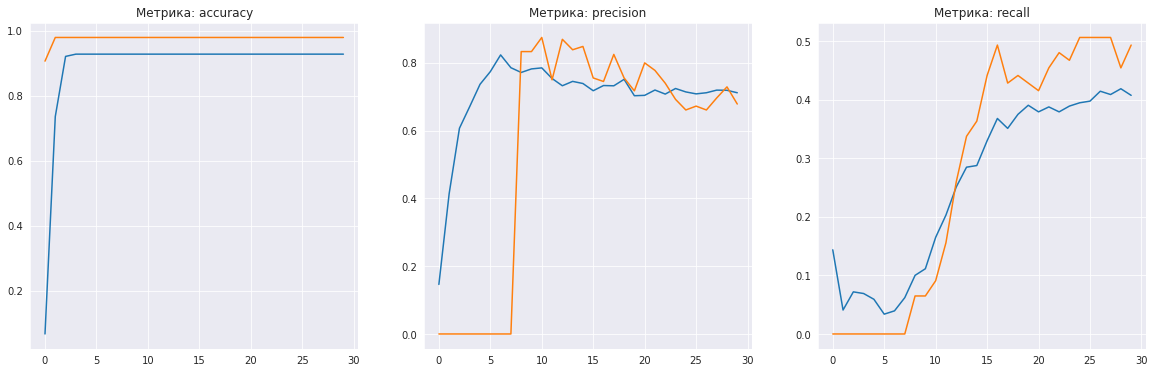

Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 0.824
Максимальная метрика precision  на проверочной выборке: 0.875
Максимальная метрика recall на обучающей выборке: 0.419
Максимальная метрика recall на проверочной выборке: 0.506


In [ ]:
worker.show_learning_information(store_learning)

**Несколько запусков**

In [ ]:
worker.train_model(
    funcModel=create_model,
    count=10)

Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.692
Максимальная метрика precision на проверочной выборке: 0.889

Максимальная метрика recall на обучающей выборке: 0.477
Максимальная метрика recall на проверочной выборке: 0.74




Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.692
Максимальная метрика precision на проверочной выборке: 0.821

Максимальная метрика recall на обучающей выборке: 0.5
Максимальная метрика recall на проверочной выборке: 0.506




Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 0.925
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.696
Максимальная метрика precision на проверочной выборке: 

#### **Эксп. №7 (Замена binary_crossentropy на categorical_crossentropy) (0.805)**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(128, input_dim=32, activation='sigmoid'))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(32, activation='sigmoid'))
  model.add(Dense(10, activation='sigmoid'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=metrics)

  # Компиляция модели
  return model

model = create_model()

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(worker.x_train,
                           worker.y_train,
                           validation_data=(worker.x_val, worker.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=30, 
                           verbose=1)

Epoch 1/30
35/35 [==============================] - 1s 14ms/step - loss: 1.5458 - accuracy: 0.0116 - recall: 0.0954 - precision: 0.1761 - val_loss: 1.3964 - val_accuracy: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/30
35/35 [==============================] - 0s 3ms/step - loss: 1.3557 - accuracy: 0.0431 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.2392 - val_accuracy: 0.4583 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/30
35/35 [==============================] - 0s 3ms/step - loss: 1.2290 - accuracy: 0.7264 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.1300 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 1.1489 - accuracy: 0.9255 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.0567 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/30
35/35 [==============================] -

График обучения:


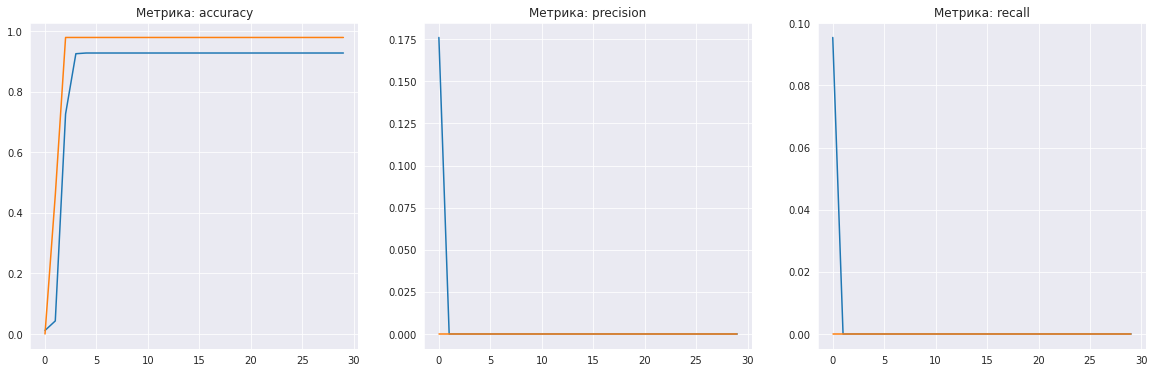

Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 0.176
Максимальная метрика precision  на проверочной выборке: 0.0
Максимальная метрика recall на обучающей выборке: 0.095
Максимальная метрика recall на проверочной выборке: 0.0


In [ ]:
worker.show_learning_information(store_learning)

**Несколько запусков**

In [ ]:
worker.train_model(
    funcModel=create_model,
    count=10)

Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 0.923
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.714
Максимальная метрика precision на проверочной выборке: 0.829

Максимальная метрика recall на обучающей выборке: 0.389
Максимальная метрика recall на проверочной выборке: 0.455




Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 0.921
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.713
Максимальная метрика precision на проверочной выборке: 0.794

Максимальная метрика recall на обучающей выборке: 0.382
Максимальная метрика recall на проверочной выборке: 0.494




Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.729
Максимальная метрика precision на проверочной выборк

#### **Эксп. №8 (Увеличение шага обучения до 0.014) (0.818)**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(128, input_dim=32, activation='sigmoid'))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(32, activation='sigmoid'))
  model.add(Dense(10, activation='sigmoid'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer=Adam(0.014), loss='categorical_crossentropy', metrics=metrics)

  # Компиляция модели
  return model

model = create_model()

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(worker.x_train,
                           worker.y_train,
                           validation_data=(worker.x_val, worker.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=30, 
                           verbose=1)

Epoch 1/30
35/35 [==============================] - 2s 14ms/step - loss: 1.3403 - accuracy: 0.3097 - recall: 0.3117 - precision: 0.1920 - val_loss: 1.0996 - val_accuracy: 0.9792 - val_recall: 0.6104 - val_precision: 0.4896
Epoch 2/30
35/35 [==============================] - 0s 4ms/step - loss: 1.1232 - accuracy: 0.9278 - recall: 0.5628 - precision: 0.4524 - val_loss: 0.9976 - val_accuracy: 0.9792 - val_recall: 0.6104 - val_precision: 0.4896
Epoch 3/30
35/35 [==============================] - 0s 4ms/step - loss: 1.0735 - accuracy: 0.9278 - recall: 0.5628 - precision: 0.4645 - val_loss: 0.9759 - val_accuracy: 0.9792 - val_recall: 0.6104 - val_precision: 0.4896
Epoch 4/30
35/35 [==============================] - 0s 4ms/step - loss: 1.0612 - accuracy: 0.9278 - recall: 0.5628 - precision: 0.4645 - val_loss: 0.9705 - val_accuracy: 0.9792 - val_recall: 0.6104 - val_precision: 0.4896
Epoch 5/30
35/35 [==============================] - 0s 4ms/step - loss: 1.0560 - accuracy: 0.9278 - recall: 0.5

График обучения:


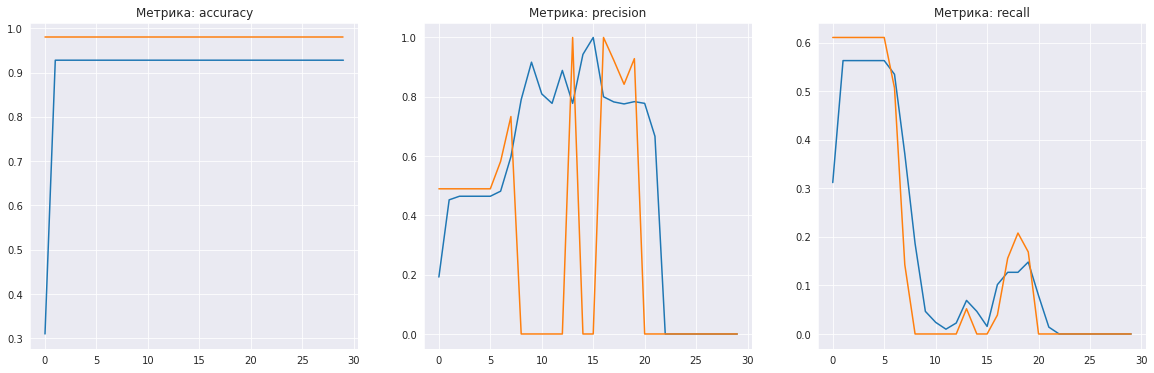

Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 1.0
Максимальная метрика precision  на проверочной выборке: 1.0
Максимальная метрика recall на обучающей выборке: 0.563
Максимальная метрика recall на проверочной выборке: 0.61


In [ ]:
worker.show_learning_information(store_learning)

**Несколько запусков**

In [ ]:
worker.train_model(
    funcModel=create_model,
    count=10)

Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 1.0
Максимальная метрика precision на проверочной выборке: 0.875

Максимальная метрика recall на обучающей выборке: 0.44
Максимальная метрика recall на проверочной выборке: 0.545




Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.773
Максимальная метрика precision на проверочной выборке: 1.0

Максимальная метрика recall на обучающей выборке: 0.444
Максимальная метрика recall на проверочной выборке: 0.532




Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 1.0
Максимальная метрика precision на проверочной выборке: 1.0


#### **Эксп. №9 (Добавление еще одного полносвязного слоя) (0.857)**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(128, input_dim=32, activation='sigmoid'))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(32, activation='sigmoid'))
  model.add(Dense(10, activation='sigmoid'))
  model.add(Dense(8, activation='sigmoid'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer=Adam(0.014), loss='categorical_crossentropy', metrics=metrics)

  # Компиляция модели
  return model

model = create_model()

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(worker.x_train,
                           worker.y_train,
                           validation_data=(worker.x_val, worker.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=100, 
                           verbose=1)

Epoch 1/100
35/35 [==============================] - 2s 14ms/step - loss: 1.1443 - accuracy: 0.7579 - recall: 0.6514 - precision: 0.2575 - val_loss: 0.9554 - val_accuracy: 0.9792 - val_recall: 0.6104 - val_precision: 0.4896
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 1.0515 - accuracy: 0.9278 - recall: 0.5628 - precision: 0.4645 - val_loss: 0.9697 - val_accuracy: 0.9792 - val_recall: 0.6104 - val_precision: 0.4896
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 1.0567 - accuracy: 0.9278 - recall: 0.2003 - precision: 0.6228 - val_loss: 0.9519 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 1.0484 - accuracy: 0.9278 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.9889 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 1.0598 - a

График обучения:


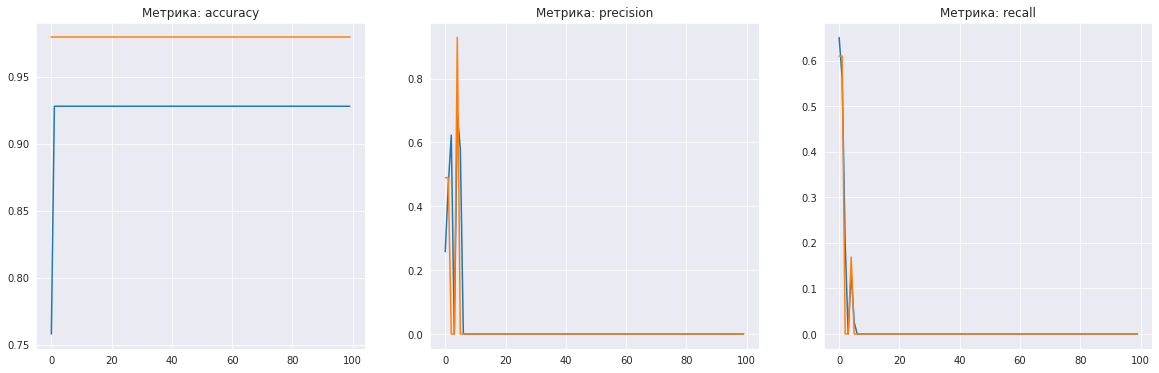

Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 0.691
Максимальная метрика precision  на проверочной выборке: 0.929
Максимальная метрика recall на обучающей выборке: 0.651
Максимальная метрика recall на проверочной выборке: 0.61


In [ ]:
worker.show_learning_information(store_learning)

**Несколько запусков**

In [ ]:
worker.train_model(
    funcModel=create_model,
    count=10)

Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.789
Максимальная метрика precision на проверочной выборке: 1.0

Максимальная метрика recall на обучающей выборке: 0.628
Максимальная метрика recall на проверочной выборке: 0.675




Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.738
Максимальная метрика precision на проверочной выборке: 0.875

Максимальная метрика recall на обучающей выборке: 0.568
Максимальная метрика recall на проверочной выборке: 0.662




Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.759
Максимальная метрика precision на проверочной выборке:

#### **Эксп. №10 (Усиление первого полносвязного слоя) (0.883)**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(512, input_dim=32, activation='sigmoid'))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(32, activation='sigmoid'))
  model.add(Dense(10, activation='sigmoid'))
  model.add(Dense(8, activation='sigmoid'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer=Adam(0.014), loss='categorical_crossentropy', metrics=metrics)

  # Компиляция модели
  return model

model = create_model()

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(worker.x_train,
                           worker.y_train,
                           validation_data=(worker.x_val, worker.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=100, 
                           verbose=1)

Epoch 1/100
35/35 [==============================] - 2s 15ms/step - loss: 1.1266 - accuracy: 0.8440 - recall: 0.5674 - precision: 0.3193 - val_loss: 0.9632 - val_accuracy: 0.9792 - val_recall: 0.6104 - val_precision: 0.4896
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 1.0514 - accuracy: 0.9278 - recall: 0.3625 - precision: 0.4525 - val_loss: 0.9541 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 1.0546 - accuracy: 0.9278 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.9532 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 1.0582 - accuracy: 0.9278 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.9618 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - 

График обучения:


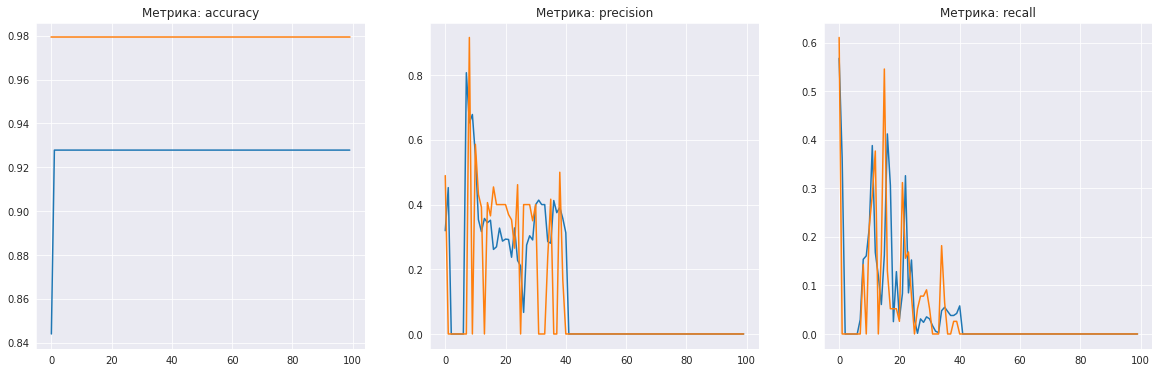

Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 0.808
Максимальная метрика precision  на проверочной выборке: 0.917
Максимальная метрика recall на обучающей выборке: 0.567
Максимальная метрика recall на проверочной выборке: 0.61


In [ ]:
worker.show_learning_information(store_learning)

**Несколько запусков**

In [ ]:
worker.train_model(
    funcModel=create_model,
    count=10)

Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.642
Максимальная метрика precision на проверочной выборке: 0.78

Максимальная метрика recall на обучающей выборке: 0.718
Максимальная метрика recall на проверочной выборке: 0.701




Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.421
Максимальная метрика precision на проверочной выборке: 0.471

Максимальная метрика recall на обучающей выборке: 0.898
Максимальная метрика recall на проверочной выборке: 0.883




Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.697
Максимальная метрика precision на проверочной выборке

### Изображения

 https://colab.research.google.com/drive/1wR8vbQ1LSJy1ZER3wIgXENUT0K-Q15Qh?usp=sharing

 https://colab.research.google.com/drive/1f95JuEQcz2LYrCbWS3GnvnXUSN2GL2HR?usp=sharing